### Where to Start with Machine Learning and Deep Learning?

This is an honestly difficult question - and you'll see a variety of different approaches. Some start "bottom-up", meaning one tries to learn all of the components of machine learning before actually attempting it. Others start "top-down", meaning one runs machine learning programs or projects before understanding much of how it works, and then tries to understand the components from the most general "down" to the highly specific.

We will tend more towards the top-down approach, but inject focus on specific concepts that are both technical and part of the machine learning terminology. Machine learning involves the fields of applied mathematics, computer science, statistics, information theory, and neuroscience - and that's at a minimum! So, be **patient** with yourself as you take your first steps into this interesting and challenging world. There is a great deal to learn, explore and refine.

Anyways, it would seem a good idea to start with the idea of **learning** before attempting anything further. What is "learning" for a computer (e.g., a machine)?

The basic concept is that *in order to learn there must be:  
* a **target** (like a learning goal or task)
* **training** on target samples
* **testing** performance on new samples 
* a **cost**, also called **loss**, for correction/direction 

Let's say we want a machine learning program that can tell if an image contains a dog or a cat. This is our **target**, and we want to achieve this goal with as high accuracy (little error) as possible. We will **train** our program on sample images of dogs and cats that we have pre-labeled. After training, we will **test** our program (also called a **model**) on new sample images of dogs and cats that we have not yet shown our program. During both the traning and testing processes, we must help our program learn by applying **cost**, or **loss**, when it makes a mistake. Conceptually, this not unlike a classic education model you find at school. 

Let's have a look at how this all works (and doesn't) in a very basic ML program (adapted from: https://github.com/aymericdamien/TensorFlow-Examples ) and then a basic **multi-layer** program (adapted from:https://github.com/pkmital/CADL/blob/master/session-2/lecture-2.ipynb).



In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

/Users/jonathansherman/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/jonathansherman/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Parameters 
learning_rate = 0.05
training_epochs = 1000 #how many cycles of training
display_step = 50

In [3]:
# Training Data 
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# Normalize data by "smushing" to 0.0 - 1.0 "unit" range
train_X = train_X/np.ndarray.max(train_X)
train_Y = train_Y/np.ndarray.max(train_Y)

print(train_X, train_Y)

[0.3058104  0.4077472  0.509684   0.62181448 0.64220183 0.3862478
 0.90621814 0.57288481 0.70336391 0.20081549 0.65258085 1.
 0.49235474 0.74108053 0.52395515 0.85904921 0.28727643] [0.49062049 0.7965368  0.6031746  0.92063492 0.48888889 0.45396825
 0.97142857 0.74920635 0.73015873 0.35238095 0.81587302 1.
 0.47619048 0.83809524 0.6984127  0.84848485 0.37518038]


In [4]:
# tf Graph Input
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Set model weights
W = tf.get_variable("weight", initializer=tf.Variable(np.abs(np.random.randn()), dtype=tf.float32))
b = tf.get_variable("bias", initializer=tf.Variable(np.abs(np.random.randn()), dtype=tf.float32))

In [5]:
# Construct a linear model to predict output of Y given X
Y_pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(Y_pred-Y, 2))/n_samples
# Gradient descent applies our cost/loss function for us
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.028453985 W= 0.21038581 b= 0.5744113
Epoch: 0100 cost= 0.023824189 W= 0.30224222 b= 0.5183717
Epoch: 0150 cost= 0.020566143 W= 0.3796263 b= 0.4719109
Epoch: 0200 cost= 0.018272864 W= 0.4445418 b= 0.43293676
Epoch: 0250 cost= 0.016658597 W= 0.49899775 b= 0.40024257
Epoch: 0300 cost= 0.015522229 W= 0.54467887 b= 0.37281635
Epoch: 0350 cost= 0.014722216 W= 0.5830002 b= 0.34980896
Epoch: 0400 cost= 0.014158956 W= 0.6151467 b= 0.33050877
Epoch: 0450 cost= 0.013762357 W= 0.64211345 b= 0.31431848
Epoch: 0500 cost= 0.013483070 W= 0.6647349 b= 0.30073687
Epoch: 0550 cost= 0.013286360 W= 0.6837123 b= 0.28934348
Epoch: 0600 cost= 0.013147797 W= 0.6996312 b= 0.27978587
Epoch: 0650 cost= 0.013050172 W= 0.71298575 b= 0.271768
Epoch: 0700 cost= 0.012981375 W= 0.7241882 b= 0.2650424
Epoch: 0750 cost= 0.012932879 W= 0.7335861 b= 0.2594
Epoch: 0800 cost= 0.012898683 W= 0.7414695 b= 0.254667
Epoch: 0850 cost= 0.012874562 W= 0.74808246 b= 0.25069654
Epoch: 0900 cost= 0.012857541 W= 0.7

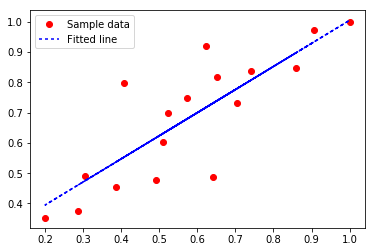

In [8]:

# Start training# Start 
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Plot sample data
    plt.plot(train_X, train_Y, 'ro', label='Sample data')
    
    #Plot linear prediction
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), dashes=[2, 2], color='blue', label='Fitted line')
    plt.legend()
    plt.show()

You can compare this 'toy' model with Google's widget here: https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise

What is essential to notice is how the cost updates the **weight** and **bias** of our predicted output for Y. This allows our program to "fit" the data by charting a line through the central relationship between X and Y samples.

While our model is able to fit a straight line through linear data, it is quite limited. A straight line can only separate very linear data. What if our data is non-linear (e.g. curved) or if has significant outliers (extreme values)? A linear cost function won't work - Let's see if we can fit a quadratic cost function to such a data collection. 

In [9]:
#reset our graph values
tf.reset_default_graph()

In [10]:
train_X = np.linspace(0, 1, 100)

train_Y = []
for _ in range(len(train_X)):
    train_Y = np.sin(train_X*np.pi*2) + np.random.uniform(0., 1., len(train_X)) + 1

train_Y = train_Y/np.ndarray.max(train_Y)
    
n_samples = train_X.shape[0]

In [11]:
# tf Graph Input
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Set model weights
W = tf.get_variable("weight", initializer=tf.Variable(np.random.randn()), dtype=tf.float32)
b = tf.get_variable("bias", initializer=tf.constant(0, dtype=tf.float32))

In [12]:
# Construct a polynomial model to predict output of Y given X
#Y_pred = X**2 + X*W + b
#Y_pred = tf.add(tf.add(tf.multiply(X, X), tf.multiply(X, W)), b)
Y_pred = tf.Variable(tf.random_normal([1]), name='prediction')
for pow_i in range(1, 4):
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), tf.add(Y_pred, b))
    

In [13]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(Y_pred-Y, 2))/n_samples
# Gradient descent applies our cost/loss function for us
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [14]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.040476326 W= -0.13754562 b= 0.47374934
Epoch: 0100 cost= 0.036795154 W= -0.18542932 b= 0.49479377
Epoch: 0150 cost= 0.036737770 W= -0.18719967 b= 0.495572
Epoch: 0200 cost= 0.036735762 W= -0.18726492 b= 0.49560332
Epoch: 0250 cost= 0.036735680 W= -0.18726744 b= 0.49560356
Epoch: 0300 cost= 0.036735680 W= -0.18726744 b= 0.49560258
Epoch: 0350 cost= 0.036735684 W= -0.18726744 b= 0.49560156
Epoch: 0400 cost= 0.036735680 W= -0.18726744 b= 0.49560058
Epoch: 0450 cost= 0.036735680 W= -0.18726744 b= 0.4955996
Epoch: 0500 cost= 0.036735684 W= -0.18726744 b= 0.49559858
Epoch: 0550 cost= 0.036735680 W= -0.18726744 b= 0.4955976
Epoch: 0600 cost= 0.036735680 W= -0.18726744 b= 0.49559662
Epoch: 0650 cost= 0.036735684 W= -0.18726744 b= 0.4955956
Epoch: 0700 cost= 0.036735680 W= -0.18726744 b= 0.49559462
Epoch: 0750 cost= 0.036735680 W= -0.18726744 b= 0.49559364
Epoch: 0800 cost= 0.036735684 W= -0.18726744 b= 0.49559262
Epoch: 0850 cost= 0.036735680 W= -0.18726744 b= 0.49559164
Ep

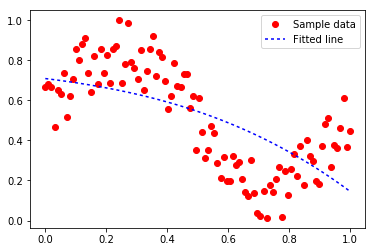

In [15]:

# Start training# Start 
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Plot sample data
    plt.plot(train_X, train_Y, 'ro', label='Sample data')
    #Plot linear prediction
    #plt.plot(train_X, train_X * train_X + sess.run(W) * train_X + sess.run(b), dashes=[2, 2], color='blue', label='Fitted line')
    plt.plot(train_X, sess.run(Y_pred, feed_dict={X: train_X}), dashes=[2, 2], color='blue', label='Fitted line')
    
    # all this just to avoid duplicating legend entries
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    plt.show()

In [16]:
tf.reset_default_graph()
sess.close()

This does a bad job of fitting. Visually, we can see it curve, but it has no ability to fit the data, which is has sine wave motion. Our function is **underfitting**. **Overfitting**, on the other hand, is when our cost function is *too* complex for our data. This can often be shown as curving too much or in the wrong directions.

### Network Layers and Nonlinear Activation Functions

Our model above has a major problem: the polynomial function we used for **regression** (our Y_pred prediction of the true Y given X) is not able to **generalize** well (meaning it cannot fit a wide variety of data ranges and features). While we could certainly find better machine learning algorithms than this poor polynomial regression or condition the data so it can fit, let's jump on the deep learning bandwagon and see how it can approach this problem. 

Deep learning has found that adding "layers" and **"activation"** functions can help models better fit more generalized data. You can think of layers as multiple levels of a process - for example instead of one instance of Y_pred = WX + b, we could do it several times in a chain, like: ```L1 = WX + b, and L2 = W*L1 + b and Y_pred = W*L2 + b```. So we pass the result of each layer to the next layer. And we can transform dimensions during this process too. It can get very technical, so we'll just focus on coding it and seeing it in action.

And for the so-called activation functions, you can think of these as functions that give a certain shape to a range of numbers. These activation functions are generally **nonlinear**, and common examples are tanh, sigmoid and relu. See below

/Users/jonathansherman/anaconda3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


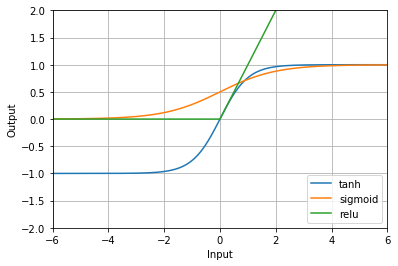

In [17]:
# These activations each give a particular output range for the input range 

x_ = np.linspace(-6,6,1000)
with tf.Session() as sess:
    plt.plot(x_, tf.nn.tanh(x_).eval(), label='tanh')
    plt.plot(x_, tf.nn.sigmoid(x_).eval(), label='sigmoid')
    plt.plot(x_, tf.nn.relu(x_).eval(), label='relu')
plt.legend(loc='lower right')
plt.xlim([-6, 6])
plt.ylim([-2, 2])
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid('on')
plt.show()



In [18]:
sess = tf.Session()
#g = tf.Graph()

train_X = np.linspace(0, 1, 1000)

train_Y = []
for _ in range(len(train_X)):
    train_Y = np.sin(train_X*np.pi*2) + np.random.uniform(0., 1., len(train_X)) + 1

train_Y = train_Y/np.ndarray.max(train_Y)
    
n_samples = train_X.shape[0]

idxs = np.arange(100)
batch_size = 10
n_batches = len(idxs) // batch_size
for batch_i in range(n_batches):
    print(idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


In [19]:
def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    fig, ax = plt.subplots(1, 1)
    ax.scatter(train_X, train_Y, alpha=0.99, c='r')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        cost = tf.reduce_mean(tf.abs(Y_pred - Y))
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

        # We now run a loop over epochs
        for it_i in range(n_iterations):
            # scrambles the order of data so the model can't learn what comes next
            idxs = np.random.permutation(range(len(train_X)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: train_X[idxs_i], Y: train_Y[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})

            if it_i % 10 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: train_X}, session=sess)
                ax.plot(train_X, ys_pred, 'k', alpha=it_i / n_iterations)
                print(training_cost)
    fig.show()
    plt.draw()
    plt.show()


In [20]:
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        if activation is None:
            h = tf.matmul(X, W) + b
        if activation is "tanh":
            h = tf.nn.tanh(tf.matmul(X, W) + b, name='tanh')
        if activation is "sigmoid":
            h = tf.nn.sigmoid(tf.matmul(X, W) + b, name='tanh')
        if activation is "relu":
            h = tf.nn.relu(tf.matmul(X, W) + b, name='tanh')
        print(tf.shape(h))
        return h

Let's see a single layer with the relu activation function, in which we input 1-node and output 10.

Tensor("layer_1/Shape:0", shape=(2,), dtype=int32)
0.311876
0.17937419
0.15414111
0.14965405
0.14604853
0.14387037
0.14368781
0.14364508
0.14342834
0.14321665
0.14310484
0.14303805
0.14280783
0.14267154
0.14253487
0.14267626
0.14227057
0.14217097
0.14205569
0.14191957
0.14179197
0.14168984
0.14153099
0.14150338
0.14134733
0.14125507
0.14114565
0.14101464
0.14104342
0.14066073
0.14054684
0.14053467
0.14031246
0.14019153
0.1401265
0.14027657
0.14006759
0.13977602
0.13985595
0.13964371
0.13946939
0.1393446
0.13926041
0.13907513
0.13904777
0.13909766
0.13882703
0.13883023
0.13858585
0.1385229
0.13839905
0.13834125
0.13824297
0.1380822
0.13800049
0.1378742
0.13781537
0.1377458
0.13768466
0.13764478
0.13764828
0.13734245
0.13725671
0.13727587
0.1370826
0.13698803
0.13698542
0.13682294
0.13674414
0.13666607
0.13658033
0.1365541
0.13641891
0.13635367
0.13633834
0.13628232
0.1362012
0.13605423
0.13596265
0.1359176
0.135978
0.13575011
0.135767
0.13559653
0.13556243
0.13554314
0.13538876
0.135358

/Users/jonathansherman/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


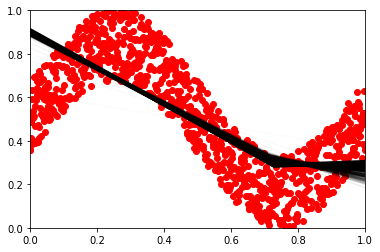

In [21]:

# tf Graph Input
X = tf.placeholder(tf.float32, name="x")
Y = tf.placeholder(tf.float32, name="y")
X_1 = tf.expand_dims(X,1)
h = linear(X_1, 1, 10, activation='relu', scope='layer_1')
Y_pred = tf.reduce_sum(h, 1) 

# And retrain w/ our new Y_pred
train(X, Y, Y_pred, n_iterations=1000)

Now for 3 interconnected layers of that is wide and then slimmer with input and output nodes.

Tensor("layer_1/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_2/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_3/Shape:0", shape=(2,), dtype=int32)
0.3736214
0.22689487
0.20778647
0.19006982
0.17384152
0.15938896
0.14639774
0.13663468
0.12963459
0.12567624
0.12320285
0.12150583
0.120592
0.119364105
0.11870767
0.11806569
0.117521316
0.11702194
0.11654555
0.116090916
0.11566166
0.115250945
0.114848584
0.11443853
0.11404112
0.113637626
0.113288336
0.11285742
0.11242365
0.11201819
0.11174179
0.11122014
0.110796906
0.11046509
0.110003635
0.10958493
0.1092058
0.10891212
0.108391955
0.108010985
0.1076893
0.10735214
0.10682843
0.10643109
0.10604256
0.1057461
0.10529079
0.10490253
0.10452418
0.10412056
0.1037643
0.10333243
0.10292729
0.10250283
0.10210843
0.101635545
0.10120032
0.10075991
0.10031477
0.09989676
0.09946078
0.09903917
0.09879016
0.09822824
0.09782903
0.09744015
0.0970206
0.096656315
0.096275344
0.09587596
0.095631406
0.09516956
0.09489668
0.094567105
0.09412939
0.09380084
0.0

/Users/jonathansherman/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


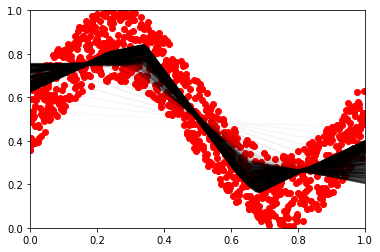

In [22]:
tf.reset_default_graph()
# tf Graph Input
X = tf.placeholder(tf.float32, name="x")
Y = tf.placeholder(tf.float32, name="y")
X_1 = tf.expand_dims(X,1)
h = linear(X_1, 1, 100, activation='relu', scope='layer_1')
h2 = linear(h, 100, 50, activation='relu', scope='layer_2')
h3 = linear(h2, 50, 1, activation='relu', scope='layer_3')
Y_pred = tf.reduce_sum(h3, 1) 

# And retrain w/ our new Y_pred
train(X, Y, Y_pred, n_iterations=1000)

Which combinations of activation functions and layers and nodes work best for you, and why? What if we had different training data ranges?

In [23]:
for op in tf.get_default_graph().get_operations(): 
    print(op.name)

x
y
ExpandDims/dim
ExpandDims
layer_1/W/Initializer/random_normal/shape
layer_1/W/Initializer/random_normal/mean
layer_1/W/Initializer/random_normal/stddev
layer_1/W/Initializer/random_normal/RandomStandardNormal
layer_1/W/Initializer/random_normal/mul
layer_1/W/Initializer/random_normal
layer_1/W
layer_1/W/Assign
layer_1/W/read
layer_1/b/Initializer/Const
layer_1/b
layer_1/b/Assign
layer_1/b/read
layer_1/MatMul
layer_1/add
layer_1/tanh
layer_1/Shape
layer_2/W/Initializer/random_normal/shape
layer_2/W/Initializer/random_normal/mean
layer_2/W/Initializer/random_normal/stddev
layer_2/W/Initializer/random_normal/RandomStandardNormal
layer_2/W/Initializer/random_normal/mul
layer_2/W/Initializer/random_normal
layer_2/W
layer_2/W/Assign
layer_2/W/read
layer_2/b/Initializer/Const
layer_2/b
layer_2/b/Assign
layer_2/b/read
layer_2/MatMul
layer_2/add
layer_2/tanh
layer_2/Shape
layer_3/W/Initializer/random_normal/shape
layer_3/W/Initializer/random_normal/mean
layer_3/W/Initializer/random_normal/s

In [24]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [25]:
show_graph(tf.get_default_graph())

/Users/jonathansherman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  app.launch_new_instance()


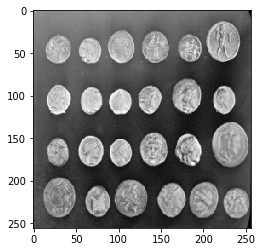

In [247]:
from skimage.data import coins
from scipy.misc import imresize
img = imresize(coins(), (256, 256))
plt.imshow(img, cmap='gray')
plt.show()

In [186]:

# We'll first collect all the positions in the image in our list, xs# We'll  
xs = []

# And the corresponding colors for each of these positions
ys = []

# Now loop over the image
for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        # And store the inputs
        xs.append([row_i, col_i])
        # And outputs that the network needs to learn to predict
        ys.append(img[row_i, col_i])

# we'll convert our lists to arrays
xs = np.array(xs)
ys = np.array(ys)

# add dim for ys (so tf treats it as matrix)

ys = np.expand_dims(ys, axis=1)

# Normalizing the input by the mean and standard deviation
xs = (xs - np.mean(xs)) / np.std(xs)

# and print the shapes
xs.shape, ys.shape

((4096, 2), (4096, 1))

In [187]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 1], name='Y')


n_neurons  = [2, 256, 128, 64, 32, 64, 128, 256, 1]

current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = linear(
        X=current_input,
        n_input=n_neurons[layer_i - 1],
        n_output=n_neurons[layer_i],
        activation="relu" if (layer_i+1) < len(n_neurons) else None,
        scope='layer_' + str(layer_i))
Y_pred = current_input

Tensor("layer_1/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_2/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_3/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_4/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_5/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_6/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_7/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_8/Shape:0", shape=(2,), dtype=int32)


[[ 26]
 [ 38]
 [128]
 [162]
 [157]
 [140]
 [ 96]
 [150]
 [136]
 [176]
 [149]
 [142]
 [101]
 [ 92]
 [101]
 [164]
 [101]
 [165]
 [112]
 [146]
 [118]
 [151]
 [ 62]
 [145]
 [ 80]
 [ 64]
 [ 43]
 [ 72]
 [155]
 [ 39]
 [ 76]
 [ 86]
 [ 58]
 [ 44]
 [ 88]
 [197]
 [153]
 [ 38]
 [ 80]
 [ 91]
 [ 94]
 [143]
 [ 50]
 [ 88]
 [ 50]
 [ 93]
 [ 35]
 [112]
 [ 58]
 [167]]
[[ 61]
 [125]
 [129]
 [ 74]
 [ 72]
 [175]
 [ 76]
 [ 56]
 [ 96]
 [ 45]
 [ 70]
 [150]
 [ 62]
 [157]
 [ 86]
 [ 29]
 [ 42]
 [163]
 [149]
 [ 30]
 [ 79]
 [107]
 [136]
 [184]
 [133]
 [156]
 [ 38]
 [ 57]
 [ 37]
 [ 85]
 [108]
 [ 45]
 [130]
 [ 93]
 [ 69]
 [166]
 [145]
 [149]
 [ 67]
 [130]
 [ 56]
 [ 94]
 [162]
 [ 68]
 [166]
 [158]
 [121]
 [193]
 [ 76]
 [ 29]]
[[ 77]
 [161]
 [103]
 [ 32]
 [143]
 [145]
 [111]
 [ 70]
 [160]
 [153]
 [ 93]
 [ 71]
 [ 30]
 [ 99]
 [ 45]
 [ 67]
 [ 48]
 [146]
 [199]
 [ 56]
 [ 85]
 [ 82]
 [ 37]
 [ 90]
 [120]
 [ 35]
 [163]
 [ 93]
 [ 59]
 [130]
 [ 90]
 [ 62]
 [ 63]
 [132]
 [193]
 [ 46]
 [ 40]
 [ 57]
 [104]
 [ 59]
 [ 85]
 [138]
 [15

[[ 51]
 [152]
 [132]
 [109]
 [ 36]
 [142]
 [104]
 [ 82]
 [122]
 [ 45]
 [ 92]
 [ 89]
 [ 53]
 [ 74]
 [153]
 [170]
 [ 56]
 [ 65]
 [125]
 [103]
 [ 40]
 [118]
 [163]
 [ 80]
 [ 89]
 [108]
 [ 33]
 [141]
 [144]
 [192]
 [156]
 [ 73]
 [ 23]
 [ 66]
 [139]
 [172]
 [ 59]
 [ 82]
 [144]
 [ 42]
 [ 51]
 [ 32]
 [155]
 [ 38]
 [142]
 [ 31]
 [ 67]
 [ 63]
 [ 82]
 [ 31]]
[[162]
 [149]
 [147]
 [ 46]
 [120]
 [ 91]
 [ 86]
 [110]
 [ 95]
 [148]
 [138]
 [ 54]
 [ 71]
 [128]
 [106]
 [ 98]
 [ 48]
 [108]
 [ 97]
 [ 47]
 [ 87]
 [149]
 [ 40]
 [139]
 [ 39]
 [ 71]
 [ 74]
 [ 44]
 [189]
 [ 70]
 [ 79]
 [ 94]
 [ 56]
 [161]
 [ 74]
 [ 95]
 [ 32]
 [ 73]
 [148]
 [108]
 [ 45]
 [ 36]
 [ 52]
 [ 88]
 [ 62]
 [ 35]
 [ 47]
 [189]
 [ 63]
 [136]]
[[ 70]
 [150]
 [105]
 [120]
 [123]
 [100]
 [ 61]
 [136]
 [ 44]
 [ 38]
 [141]
 [ 27]
 [ 62]
 [ 98]
 [123]
 [ 77]
 [ 40]
 [ 89]
 [ 60]
 [112]
 [ 76]
 [ 71]
 [111]
 [168]
 [ 40]
 [138]
 [124]
 [ 57]
 [ 54]
 [163]
 [111]
 [150]
 [177]
 [116]
 [ 57]
 [ 38]
 [148]
 [ 53]
 [122]
 [104]
 [129]
 [149]
 [ 4

 [ 81]]
[[ 80]
 [110]
 [ 44]
 [169]
 [124]
 [ 70]
 [ 51]
 [ 64]
 [148]
 [ 70]
 [146]
 [ 91]
 [ 37]
 [103]
 [ 54]
 [ 46]
 [163]
 [147]
 [ 37]
 [172]
 [108]
 [169]
 [ 53]
 [ 66]
 [172]
 [ 52]
 [132]
 [ 95]
 [ 48]
 [ 78]
 [ 44]
 [ 36]
 [ 60]
 [ 88]
 [ 68]
 [ 30]
 [ 65]
 [ 79]
 [160]
 [149]
 [161]
 [ 59]
 [149]
 [ 48]
 [ 50]
 [ 52]
 [157]
 [ 37]
 [ 35]
 [ 67]]
[[ 27]
 [ 88]
 [ 98]
 [ 80]
 [ 28]
 [126]
 [ 74]
 [118]
 [160]
 [ 68]
 [150]
 [149]
 [ 25]
 [145]
 [175]
 [101]
 [107]
 [130]
 [165]
 [ 85]
 [121]
 [159]
 [186]
 [142]
 [103]
 [ 44]
 [109]
 [ 94]
 [157]
 [ 88]
 [100]
 [ 82]
 [ 42]
 [ 41]
 [ 74]
 [105]
 [128]
 [ 34]
 [144]
 [ 40]
 [175]
 [ 43]
 [125]
 [ 52]
 [ 57]
 [ 56]
 [103]
 [123]
 [ 44]
 [ 85]]
[[ 40]
 [113]
 [ 51]
 [130]
 [ 79]
 [ 94]
 [ 74]
 [ 74]
 [ 60]
 [ 60]
 [ 50]
 [ 49]
 [144]
 [168]
 [185]
 [ 79]
 [ 82]
 [135]
 [ 74]
 [ 46]
 [165]
 [152]
 [159]
 [104]
 [ 73]
 [ 98]
 [198]
 [ 48]
 [ 36]
 [128]
 [115]
 [112]
 [ 42]
 [169]
 [ 92]
 [120]
 [ 82]
 [114]
 [122]
 [118]
 [ 83]
 [1

[[ 92]
 [ 30]
 [ 87]
 [146]
 [ 59]
 [108]
 [ 42]
 [ 79]
 [ 70]
 [154]
 [ 67]
 [ 68]
 [105]
 [109]
 [140]
 [ 40]
 [ 87]
 [108]
 [ 70]
 [ 60]
 [ 56]
 [137]
 [ 80]
 [ 93]
 [ 53]
 [ 30]
 [ 48]
 [142]
 [126]
 [170]
 [ 32]
 [162]
 [154]
 [143]
 [150]
 [ 54]
 [ 57]
 [156]
 [ 88]
 [ 51]
 [176]
 [108]
 [ 48]
 [155]
 [167]
 [ 39]
 [ 63]
 [ 44]
 [ 95]
 [139]]
[[ 90]
 [ 52]
 [162]
 [ 33]
 [104]
 [ 85]
 [ 79]
 [ 76]
 [ 94]
 [116]
 [ 50]
 [162]
 [100]
 [ 50]
 [ 53]
 [ 61]
 [140]
 [154]
 [ 36]
 [141]
 [131]
 [166]
 [128]
 [ 77]
 [115]
 [179]
 [137]
 [168]
 [ 28]
 [ 46]
 [ 34]
 [ 49]
 [ 55]
 [164]
 [ 59]
 [ 44]
 [141]
 [ 51]
 [ 53]
 [186]
 [ 56]
 [ 45]
 [ 70]
 [ 39]
 [ 96]
 [ 52]
 [146]
 [ 58]
 [ 39]
 [165]]
[[ 51]
 [203]
 [ 51]
 [147]
 [120]
 [ 97]
 [161]
 [141]
 [ 99]
 [ 52]
 [119]
 [129]
 [ 86]
 [ 44]
 [138]
 [ 47]
 [ 30]
 [134]
 [162]
 [116]
 [175]
 [145]
 [ 98]
 [ 72]
 [185]
 [ 93]
 [ 37]
 [143]
 [ 82]
 [ 96]
 [ 38]
 [ 94]
 [ 55]
 [192]
 [171]
 [170]
 [ 83]
 [171]
 [159]
 [158]
 [ 84]
 [ 53]
 [10

[[120]
 [ 50]
 [176]
 [166]
 [118]
 [137]
 [ 56]
 [140]
 [ 61]
 [ 45]
 [ 76]
 [138]
 [127]
 [184]
 [152]
 [ 50]
 [ 91]
 [137]
 [ 66]
 [ 97]
 [137]
 [ 31]
 [ 57]
 [130]
 [ 29]
 [ 61]
 [ 29]
 [104]
 [ 26]
 [ 54]
 [ 53]
 [132]
 [121]
 [179]
 [138]
 [ 28]
 [ 95]
 [ 32]
 [ 99]
 [ 35]
 [ 36]
 [191]
 [ 36]
 [ 38]
 [ 46]
 [ 71]
 [ 39]
 [ 84]
 [148]
 [182]]
[[ 68]
 [ 52]
 [ 41]
 [ 65]
 [ 60]
 [ 52]
 [184]
 [ 46]
 [ 28]
 [ 84]
 [ 58]
 [ 35]
 [ 65]
 [ 65]
 [ 51]
 [ 95]
 [108]
 [ 33]
 [146]
 [118]
 [147]
 [ 67]
 [ 69]
 [ 44]
 [ 99]
 [ 34]
 [148]
 [ 52]
 [187]
 [162]
 [127]
 [157]
 [ 46]
 [ 66]
 [156]
 [140]
 [196]
 [ 88]
 [115]
 [ 50]
 [ 47]
 [142]
 [ 31]
 [ 97]
 [ 34]
 [ 46]
 [ 58]
 [ 68]
 [163]
 [188]]
[[ 28]
 [170]
 [ 61]
 [ 55]
 [ 91]
 [ 51]
 [ 39]
 [128]
 [ 87]
 [ 71]
 [ 97]
 [157]
 [197]
 [102]
 [ 30]
 [105]
 [169]
 [107]
 [ 53]
 [124]
 [ 67]
 [ 86]
 [ 38]
 [160]
 [ 90]
 [143]
 [128]
 [158]
 [168]
 [ 35]
 [ 45]
 [ 48]
 [ 86]
 [174]
 [126]
 [ 32]
 [ 90]
 [ 60]
 [ 43]
 [ 98]
 [ 33]
 [ 53]
 [15

[[166]
 [ 27]
 [ 65]
 [ 65]
 [ 48]
 [144]
 [ 98]
 [ 54]
 [138]
 [ 59]
 [133]
 [ 31]
 [132]
 [ 50]
 [ 55]
 [175]
 [147]
 [ 35]
 [ 44]
 [107]
 [ 73]
 [108]
 [141]
 [ 28]
 [ 63]
 [ 53]
 [ 70]
 [139]
 [163]
 [ 44]
 [ 45]
 [ 43]
 [149]
 [ 56]
 [ 70]
 [ 67]
 [135]
 [ 76]
 [ 31]
 [ 63]
 [ 75]
 [161]
 [ 65]
 [ 27]
 [133]
 [128]
 [158]
 [ 74]
 [147]
 [152]]
[[ 37]
 [142]
 [ 62]
 [ 31]
 [ 79]
 [ 83]
 [ 33]
 [ 67]
 [ 29]
 [ 36]
 [ 62]
 [144]
 [ 60]
 [ 89]
 [ 63]
 [ 87]
 [167]
 [ 69]
 [149]
 [ 35]
 [127]
 [ 28]
 [ 67]
 [ 50]
 [128]
 [116]
 [ 70]
 [ 43]
 [ 42]
 [149]
 [ 85]
 [159]
 [ 33]
 [ 36]
 [150]
 [ 53]
 [ 66]
 [176]
 [ 65]
 [ 26]
 [128]
 [140]
 [155]
 [182]
 [ 48]
 [ 69]
 [135]
 [ 58]
 [ 94]
 [ 93]]
[[136]
 [ 27]
 [ 36]
 [110]
 [ 48]
 [134]
 [ 55]
 [ 91]
 [ 39]
 [178]
 [ 61]
 [ 91]
 [ 70]
 [ 78]
 [108]
 [ 38]
 [148]
 [ 84]
 [ 29]
 [149]
 [150]
 [ 50]
 [ 49]
 [ 64]
 [ 97]
 [ 54]
 [174]
 [ 48]
 [169]
 [ 75]
 [ 40]
 [175]
 [100]
 [156]
 [ 30]
 [107]
 [ 40]
 [ 83]
 [ 65]
 [ 79]
 [ 62]
 [ 39]
 [13

[[131]
 [123]
 [ 52]
 [ 66]
 [168]
 [148]
 [ 42]
 [141]
 [ 68]
 [ 63]
 [129]
 [110]
 [ 65]
 [ 44]
 [ 41]
 [ 31]
 [ 88]
 [ 39]
 [152]
 [ 51]
 [116]
 [ 85]
 [114]
 [ 27]
 [ 88]
 [184]
 [ 51]
 [156]
 [107]
 [ 67]
 [ 48]
 [ 66]
 [ 91]
 [ 44]
 [154]
 [142]
 [ 94]
 [176]
 [ 91]
 [ 46]
 [ 55]
 [115]
 [167]
 [ 39]
 [102]
 [130]
 [187]
 [166]
 [128]
 [ 38]]
[[ 97]
 [ 70]
 [ 98]
 [ 37]
 [ 61]
 [ 60]
 [132]
 [181]
 [ 94]
 [169]
 [167]
 [ 73]
 [105]
 [123]
 [102]
 [ 40]
 [ 87]
 [161]
 [150]
 [ 95]
 [ 90]
 [ 32]
 [ 60]
 [ 74]
 [156]
 [ 49]
 [126]
 [ 61]
 [194]
 [ 69]
 [121]
 [ 79]
 [146]
 [159]
 [107]
 [103]
 [ 54]
 [146]
 [ 37]
 [ 90]
 [ 59]
 [ 80]
 [135]
 [102]
 [ 81]
 [106]
 [ 72]
 [134]
 [115]
 [ 28]]
[[ 44]
 [ 42]
 [162]
 [ 68]
 [125]
 [ 49]
 [ 48]
 [157]
 [121]
 [163]
 [133]
 [ 90]
 [ 32]
 [161]
 [136]
 [ 40]
 [150]
 [100]
 [163]
 [139]
 [ 75]
 [ 50]
 [112]
 [168]
 [ 45]
 [125]
 [160]
 [146]
 [142]
 [140]
 [ 48]
 [109]
 [121]
 [ 32]
 [ 88]
 [ 29]
 [ 53]
 [ 65]
 [161]
 [110]
 [ 66]
 [ 71]
 [ 3

[[114]
 [107]
 [ 66]
 [ 38]
 [ 46]
 [155]
 [179]
 [104]
 [187]
 [ 58]
 [ 31]
 [167]
 [ 67]
 [ 34]
 [ 87]
 [ 84]
 [ 63]
 [ 36]
 [126]
 [138]
 [ 49]
 [ 96]
 [ 90]
 [125]
 [171]
 [ 40]
 [ 89]
 [117]
 [125]
 [158]
 [ 85]
 [111]
 [ 27]
 [158]
 [ 59]
 [139]
 [180]
 [ 97]
 [148]
 [ 73]
 [ 83]
 [ 88]
 [110]
 [173]
 [ 53]
 [110]
 [ 34]
 [ 94]
 [ 55]
 [ 88]]
[[ 81]
 [ 41]
 [ 66]
 [ 50]
 [ 64]
 [ 81]
 [177]
 [141]
 [107]
 [179]
 [100]
 [ 40]
 [153]
 [121]
 [100]
 [133]
 [ 68]
 [ 49]
 [ 53]
 [132]
 [ 91]
 [107]
 [ 57]
 [ 74]
 [ 45]
 [ 67]
 [ 35]
 [167]
 [ 40]
 [ 74]
 [ 58]
 [170]
 [116]
 [100]
 [100]
 [ 87]
 [112]
 [ 68]
 [137]
 [ 80]
 [145]
 [ 84]
 [ 58]
 [ 60]
 [ 44]
 [ 89]
 [ 35]
 [100]
 [ 46]
 [123]]
[[ 88]
 [ 91]
 [ 75]
 [ 66]
 [159]
 [ 36]
 [ 93]
 [151]
 [137]
 [114]
 [149]
 [ 85]
 [ 39]
 [158]
 [ 56]
 [106]
 [164]
 [ 54]
 [ 42]
 [174]
 [ 39]
 [ 35]
 [ 95]
 [ 73]
 [ 54]
 [123]
 [ 53]
 [ 53]
 [144]
 [ 25]
 [ 32]
 [ 45]
 [ 31]
 [ 50]
 [ 41]
 [102]
 [ 44]
 [ 49]
 [154]
 [ 71]
 [ 62]
 [ 93]
 [14

[[ 85]
 [ 65]
 [ 74]
 [ 58]
 [126]
 [ 38]
 [ 91]
 [ 29]
 [ 27]
 [ 90]
 [189]
 [157]
 [ 75]
 [100]
 [ 73]
 [ 76]
 [ 36]
 [ 53]
 [ 66]
 [159]
 [168]
 [ 87]
 [165]
 [ 30]
 [ 91]
 [162]
 [ 35]
 [151]
 [ 86]
 [ 69]
 [ 64]
 [ 42]
 [148]
 [158]
 [159]
 [112]
 [ 55]
 [144]
 [ 39]
 [128]
 [180]
 [ 77]
 [ 94]
 [155]
 [110]
 [112]
 [107]
 [ 88]
 [ 35]
 [ 45]]
[[ 32]
 [ 30]
 [ 33]
 [ 50]
 [ 66]
 [ 63]
 [189]
 [103]
 [150]
 [ 57]
 [103]
 [132]
 [ 48]
 [180]
 [ 50]
 [ 94]
 [ 66]
 [142]
 [184]
 [ 23]
 [170]
 [ 93]
 [ 56]
 [ 43]
 [ 39]
 [163]
 [ 59]
 [149]
 [111]
 [ 31]
 [132]
 [180]
 [ 36]
 [163]
 [ 25]
 [ 90]
 [153]
 [129]
 [161]
 [ 97]
 [161]
 [104]
 [ 27]
 [ 79]
 [ 94]
 [ 28]
 [162]
 [ 80]
 [ 65]
 [ 34]]
[[ 26]
 [170]
 [153]
 [ 81]
 [ 73]
 [ 94]
 [107]
 [ 57]
 [ 37]
 [109]
 [ 46]
 [162]
 [143]
 [ 91]
 [ 24]
 [ 53]
 [119]
 [ 32]
 [188]
 [140]
 [ 88]
 [136]
 [148]
 [ 35]
 [131]
 [149]
 [ 37]
 [126]
 [144]
 [ 67]
 [114]
 [124]
 [ 40]
 [136]
 [ 52]
 [103]
 [192]
 [112]
 [ 68]
 [ 57]
 [184]
 [ 36]
 [13

[[122]
 [ 56]
 [ 37]
 [ 52]
 [115]
 [ 25]
 [ 57]
 [105]
 [ 64]
 [ 33]
 [ 94]
 [ 28]
 [108]
 [ 43]
 [ 88]
 [ 49]
 [ 92]
 [ 99]
 [115]
 [146]
 [163]
 [ 42]
 [ 46]
 [129]
 [100]
 [ 43]
 [ 67]
 [ 92]
 [ 63]
 [110]
 [ 73]
 [ 76]
 [ 59]
 [ 39]
 [132]
 [ 41]
 [179]
 [ 70]
 [184]
 [ 55]
 [191]
 [ 81]
 [ 89]
 [ 97]
 [ 96]
 [ 70]
 [ 82]
 [105]
 [ 41]
 [145]]
[[119]
 [161]
 [108]
 [ 68]
 [ 31]
 [ 85]
 [104]
 [193]
 [ 50]
 [159]
 [ 62]
 [116]
 [175]
 [ 53]
 [119]
 [ 45]
 [124]
 [ 56]
 [111]
 [ 86]
 [ 72]
 [ 56]
 [103]
 [168]
 [ 49]
 [ 54]
 [ 37]
 [ 99]
 [ 99]
 [129]
 [103]
 [ 47]
 [143]
 [ 29]
 [116]
 [122]
 [141]
 [112]
 [ 59]
 [104]
 [106]
 [115]
 [ 44]
 [177]
 [ 56]
 [ 40]
 [ 84]
 [113]
 [163]
 [ 33]]
[[127]
 [125]
 [ 54]
 [162]
 [ 87]
 [109]
 [117]
 [ 27]
 [165]
 [ 65]
 [ 64]
 [ 71]
 [148]
 [ 52]
 [145]
 [ 88]
 [ 84]
 [113]
 [112]
 [ 42]
 [ 53]
 [ 30]
 [ 41]
 [ 77]
 [ 58]
 [151]
 [ 85]
 [106]
 [133]
 [ 30]
 [108]
 [ 72]
 [113]
 [ 70]
 [ 69]
 [ 57]
 [ 91]
 [ 39]
 [152]
 [ 70]
 [ 94]
 [160]
 [ 6

[[ 60]
 [ 75]
 [ 72]
 [155]
 [ 80]
 [153]
 [ 97]
 [162]
 [ 53]
 [178]
 [ 63]
 [ 89]
 [ 58]
 [ 51]
 [136]
 [146]
 [ 34]
 [ 55]
 [ 50]
 [ 40]
 [ 90]
 [ 46]
 [ 72]
 [108]
 [104]
 [164]
 [ 52]
 [ 59]
 [ 95]
 [ 41]
 [170]
 [148]
 [ 41]
 [ 65]
 [ 41]
 [ 83]
 [164]
 [ 95]
 [ 70]
 [136]
 [ 77]
 [ 70]
 [158]
 [ 51]
 [143]
 [ 93]
 [126]
 [ 49]
 [ 58]
 [ 41]]
[[ 84]
 [141]
 [ 89]
 [ 61]
 [ 85]
 [162]
 [167]
 [142]
 [150]
 [110]
 [129]
 [ 52]
 [154]
 [ 85]
 [ 68]
 [147]
 [130]
 [ 65]
 [ 81]
 [ 36]
 [157]
 [160]
 [121]
 [183]
 [112]
 [122]
 [106]
 [ 92]
 [125]
 [ 97]
 [143]
 [136]
 [ 38]
 [ 31]
 [ 81]
 [ 43]
 [ 84]
 [ 34]
 [147]
 [122]
 [143]
 [140]
 [130]
 [ 75]
 [ 61]
 [ 80]
 [174]
 [ 51]
 [ 50]
 [ 43]]
[[ 35]
 [170]
 [ 37]
 [117]
 [ 45]
 [116]
 [ 30]
 [ 57]
 [ 77]
 [149]
 [144]
 [ 70]
 [ 38]
 [131]
 [108]
 [ 62]
 [ 99]
 [ 96]
 [109]
 [159]
 [ 56]
 [102]
 [130]
 [ 66]
 [145]
 [179]
 [ 60]
 [193]
 [154]
 [ 64]
 [171]
 [134]
 [ 56]
 [142]
 [140]
 [ 73]
 [ 46]
 [120]
 [144]
 [ 59]
 [ 31]
 [133]
 [ 9

[[ 41]
 [ 43]
 [ 44]
 [ 73]
 [103]
 [110]
 [ 29]
 [116]
 [157]
 [107]
 [ 31]
 [203]
 [ 85]
 [ 38]
 [129]
 [ 66]
 [ 40]
 [144]
 [ 86]
 [119]
 [ 55]
 [ 75]
 [ 72]
 [167]
 [ 85]
 [180]
 [ 33]
 [159]
 [ 43]
 [135]
 [124]
 [151]
 [ 52]
 [ 95]
 [ 72]
 [ 94]
 [ 91]
 [ 44]
 [ 36]
 [133]
 [107]
 [ 40]
 [128]
 [ 77]
 [114]
 [189]
 [184]
 [173]
 [123]
 [174]]
[[ 47]
 [163]
 [ 62]
 [198]
 [ 75]
 [137]
 [173]
 [ 34]
 [170]
 [188]
 [ 66]
 [131]
 [136]
 [123]
 [ 85]
 [ 71]
 [ 51]
 [ 67]
 [ 26]
 [ 81]
 [151]
 [121]
 [ 52]
 [138]
 [ 30]
 [168]
 [ 49]
 [154]
 [158]
 [ 67]
 [ 65]
 [121]
 [170]
 [185]
 [118]
 [118]
 [ 98]
 [ 68]
 [ 41]
 [ 26]
 [105]
 [108]
 [ 48]
 [ 27]
 [179]
 [151]
 [ 37]
 [ 87]
 [125]
 [168]]
[[167]
 [ 57]
 [ 38]
 [ 42]
 [101]
 [142]
 [140]
 [100]
 [ 88]
 [ 29]
 [ 95]
 [104]
 [ 99]
 [ 91]
 [ 53]
 [105]
 [175]
 [ 92]
 [ 75]
 [ 96]
 [ 27]
 [ 61]
 [127]
 [ 35]
 [149]
 [ 45]
 [ 44]
 [140]
 [ 39]
 [ 46]
 [ 54]
 [ 52]
 [173]
 [124]
 [ 72]
 [ 90]
 [132]
 [ 79]
 [131]
 [ 35]
 [125]
 [ 59]
 [ 5

[[123]
 [184]
 [ 82]
 [ 64]
 [ 75]
 [ 81]
 [149]
 [126]
 [175]
 [138]
 [179]
 [171]
 [144]
 [ 54]
 [128]
 [ 52]
 [ 97]
 [137]
 [162]
 [122]
 [ 73]
 [ 95]
 [141]
 [ 49]
 [115]
 [165]
 [ 36]
 [106]
 [127]
 [116]
 [106]
 [189]
 [191]
 [191]
 [ 63]
 [150]
 [107]
 [ 97]
 [ 35]
 [165]
 [ 65]
 [ 43]
 [162]
 [ 91]
 [ 42]
 [162]
 [109]
 [ 82]
 [130]
 [159]]
[[ 79]
 [ 69]
 [133]
 [ 79]
 [ 36]
 [ 44]
 [139]
 [101]
 [ 92]
 [113]
 [126]
 [ 73]
 [ 65]
 [ 88]
 [142]
 [ 53]
 [ 42]
 [ 94]
 [ 88]
 [ 64]
 [135]
 [110]
 [ 98]
 [ 39]
 [124]
 [140]
 [ 93]
 [ 47]
 [ 63]
 [ 42]
 [ 81]
 [ 39]
 [119]
 [ 46]
 [ 92]
 [168]
 [176]
 [ 40]
 [ 31]
 [ 85]
 [160]
 [ 37]
 [120]
 [ 56]
 [ 77]
 [ 84]
 [ 92]
 [ 78]
 [ 91]
 [ 71]]
[[157]
 [199]
 [ 50]
 [ 70]
 [ 88]
 [ 54]
 [ 74]
 [ 31]
 [ 91]
 [119]
 [ 46]
 [ 67]
 [166]
 [ 91]
 [180]
 [ 45]
 [162]
 [114]
 [ 67]
 [152]
 [ 28]
 [ 46]
 [ 49]
 [ 43]
 [121]
 [ 46]
 [105]
 [ 63]
 [ 82]
 [153]
 [ 50]
 [112]
 [ 53]
 [133]
 [155]
 [ 24]
 [ 39]
 [139]
 [145]
 [ 44]
 [ 41]
 [192]
 [16

[[ 81]
 [ 63]
 [113]
 [ 85]
 [ 63]
 [ 56]
 [ 45]
 [145]
 [ 46]
 [ 31]
 [ 82]
 [ 99]
 [133]
 [ 48]
 [ 90]
 [ 53]
 [ 65]
 [139]
 [ 73]
 [ 38]
 [172]
 [160]
 [ 35]
 [ 41]
 [ 99]
 [161]
 [191]
 [ 71]
 [ 90]
 [200]
 [104]
 [ 57]
 [103]
 [135]
 [142]
 [ 34]
 [128]
 [ 32]
 [166]
 [ 70]
 [ 74]
 [ 30]
 [124]
 [ 43]
 [ 55]
 [103]
 [ 41]
 [ 44]
 [ 56]
 [188]]
[[ 28]
 [ 57]
 [ 57]
 [127]
 [142]
 [100]
 [175]
 [ 33]
 [104]
 [174]
 [185]
 [ 43]
 [134]
 [ 89]
 [128]
 [ 36]
 [ 31]
 [ 43]
 [ 37]
 [ 32]
 [136]
 [ 69]
 [163]
 [ 45]
 [ 46]
 [ 61]
 [ 87]
 [ 51]
 [ 90]
 [ 54]
 [ 89]
 [178]
 [118]
 [ 47]
 [122]
 [ 71]
 [105]
 [ 38]
 [ 88]
 [ 90]
 [158]
 [ 52]
 [172]
 [ 32]
 [107]
 [ 46]
 [146]
 [137]
 [141]
 [ 87]]
[[ 60]
 [ 68]
 [ 59]
 [101]
 [ 86]
 [ 97]
 [100]
 [151]
 [ 75]
 [ 31]
 [ 40]
 [158]
 [124]
 [ 34]
 [ 65]
 [173]
 [158]
 [ 92]
 [128]
 [ 61]
 [ 27]
 [ 96]
 [ 69]
 [103]
 [ 38]
 [141]
 [ 86]
 [164]
 [165]
 [154]
 [112]
 [ 55]
 [130]
 [107]
 [124]
 [106]
 [ 62]
 [116]
 [ 90]
 [167]
 [170]
 [170]
 [ 5

[[165]
 [ 39]
 [ 34]
 [ 66]
 [100]
 [104]
 [ 61]
 [125]
 [ 85]
 [151]
 [ 74]
 [ 79]
 [ 50]
 [100]
 [ 66]
 [ 41]
 [ 39]
 [ 35]
 [ 47]
 [113]
 [114]
 [103]
 [131]
 [118]
 [ 87]
 [149]
 [151]
 [ 77]
 [ 35]
 [167]
 [ 67]
 [ 86]
 [ 31]
 [162]
 [ 72]
 [160]
 [ 56]
 [ 60]
 [ 88]
 [150]
 [ 27]
 [ 64]
 [132]
 [104]
 [ 55]
 [135]
 [ 30]
 [ 84]
 [ 95]
 [108]]
[[ 42]
 [152]
 [111]
 [162]
 [ 48]
 [128]
 [ 57]
 [122]
 [125]
 [174]
 [ 81]
 [ 50]
 [176]
 [ 95]
 [184]
 [ 48]
 [ 35]
 [121]
 [171]
 [ 82]
 [ 44]
 [129]
 [172]
 [116]
 [ 77]
 [157]
 [107]
 [ 82]
 [128]
 [ 35]
 [120]
 [128]
 [162]
 [ 78]
 [153]
 [ 48]
 [ 47]
 [ 55]
 [ 72]
 [129]
 [100]
 [ 48]
 [ 46]
 [ 28]
 [151]
 [ 63]
 [175]
 [ 37]
 [ 56]
 [ 83]]
[[151]
 [151]
 [ 93]
 [ 35]
 [104]
 [152]
 [ 70]
 [ 56]
 [151]
 [168]
 [109]
 [ 24]
 [ 61]
 [ 91]
 [ 31]
 [102]
 [ 50]
 [ 42]
 [131]
 [ 97]
 [ 43]
 [153]
 [ 36]
 [117]
 [105]
 [ 75]
 [ 75]
 [ 84]
 [179]
 [144]
 [ 84]
 [ 49]
 [112]
 [101]
 [ 78]
 [ 57]
 [ 38]
 [ 70]
 [ 94]
 [ 59]
 [ 72]
 [123]
 [16

[[ 75]
 [119]
 [ 39]
 [119]
 [126]
 [124]
 [ 89]
 [ 44]
 [ 96]
 [ 97]
 [134]
 [ 55]
 [ 85]
 [140]
 [172]
 [ 53]
 [114]
 [119]
 [128]
 [ 61]
 [177]
 [186]
 [ 32]
 [172]
 [126]
 [ 63]
 [164]
 [111]
 [142]
 [ 80]
 [170]
 [ 95]
 [ 83]
 [126]
 [134]
 [153]
 [ 76]
 [167]
 [ 47]
 [ 72]
 [138]
 [ 49]
 [ 83]
 [ 44]
 [ 52]
 [159]
 [ 56]
 [173]
 [ 88]
 [ 76]]
[[174]
 [135]
 [ 46]
 [ 66]
 [ 49]
 [ 68]
 [ 88]
 [143]
 [101]
 [ 44]
 [ 94]
 [166]
 [ 48]
 [ 99]
 [121]
 [184]
 [108]
 [ 36]
 [ 63]
 [124]
 [ 34]
 [ 40]
 [ 67]
 [ 66]
 [147]
 [ 84]
 [ 40]
 [ 57]
 [ 67]
 [ 76]
 [ 54]
 [174]
 [ 89]
 [ 59]
 [126]
 [ 63]
 [ 55]
 [ 88]
 [125]
 [ 44]
 [ 95]
 [ 62]
 [ 41]
 [ 70]
 [140]
 [105]
 [ 56]
 [109]
 [103]
 [183]]
[[ 61]
 [152]
 [ 40]
 [ 92]
 [ 61]
 [ 62]
 [ 45]
 [170]
 [175]
 [ 84]
 [132]
 [ 24]
 [ 82]
 [132]
 [140]
 [ 68]
 [ 66]
 [ 34]
 [ 31]
 [180]
 [133]
 [ 47]
 [ 38]
 [107]
 [ 66]
 [ 88]
 [146]
 [ 92]
 [ 44]
 [122]
 [145]
 [ 52]
 [ 38]
 [ 88]
 [ 52]
 [163]
 [ 32]
 [125]
 [ 86]
 [ 79]
 [157]
 [ 55]
 [ 6

[[155]
 [ 46]
 [ 28]
 [ 44]
 [ 33]
 [121]
 [161]
 [ 72]
 [112]
 [ 58]
 [ 66]
 [ 56]
 [ 44]
 [110]
 [ 54]
 [ 46]
 [ 46]
 [151]
 [ 63]
 [ 29]
 [132]
 [ 51]
 [157]
 [149]
 [171]
 [166]
 [ 53]
 [ 33]
 [ 63]
 [ 98]
 [130]
 [ 58]
 [ 34]
 [145]
 [105]
 [ 33]
 [133]
 [ 56]
 [111]
 [ 56]
 [150]
 [ 41]
 [ 89]
 [ 76]
 [ 70]
 [145]
 [162]
 [104]
 [ 87]
 [ 42]]
[[166]
 [ 87]
 [ 32]
 [142]
 [ 37]
 [ 34]
 [158]
 [178]
 [ 66]
 [100]
 [ 95]
 [167]
 [ 82]
 [ 26]
 [ 70]
 [ 79]
 [153]
 [ 74]
 [ 71]
 [177]
 [162]
 [156]
 [116]
 [ 54]
 [ 45]
 [158]
 [ 98]
 [118]
 [ 58]
 [ 94]
 [174]
 [ 51]
 [ 89]
 [156]
 [ 53]
 [ 85]
 [ 82]
 [130]
 [ 61]
 [142]
 [129]
 [191]
 [148]
 [ 60]
 [ 43]
 [132]
 [184]
 [164]
 [162]
 [155]]
[[113]
 [ 65]
 [ 67]
 [101]
 [ 81]
 [ 89]
 [149]
 [173]
 [146]
 [149]
 [ 41]
 [ 91]
 [ 52]
 [172]
 [ 50]
 [151]
 [ 39]
 [ 54]
 [ 53]
 [136]
 [ 41]
 [123]
 [ 41]
 [116]
 [ 36]
 [ 48]
 [ 88]
 [171]
 [ 77]
 [175]
 [163]
 [102]
 [163]
 [ 66]
 [203]
 [135]
 [174]
 [ 87]
 [ 71]
 [137]
 [166]
 [154]
 [ 5

 [ 36]]
[[ 38]
 [203]
 [ 33]
 [ 35]
 [ 57]
 [ 44]
 [ 80]
 [121]
 [149]
 [ 28]
 [155]
 [ 49]
 [ 66]
 [ 77]
 [ 31]
 [121]
 [100]
 [ 66]
 [ 34]
 [ 90]
 [ 27]
 [ 70]
 [ 87]
 [ 56]
 [149]
 [185]
 [ 78]
 [ 47]
 [ 74]
 [ 95]
 [ 41]
 [ 56]
 [150]
 [157]
 [140]
 [113]
 [164]
 [156]
 [166]
 [ 56]
 [ 69]
 [ 70]
 [ 82]
 [104]
 [ 51]
 [164]
 [ 33]
 [ 52]
 [174]
 [149]]
[[ 33]
 [ 34]
 [149]
 [132]
 [ 38]
 [138]
 [ 76]
 [ 29]
 [125]
 [119]
 [ 68]
 [ 62]
 [108]
 [160]
 [ 76]
 [169]
 [111]
 [171]
 [151]
 [141]
 [182]
 [ 86]
 [117]
 [ 58]
 [135]
 [173]
 [149]
 [ 47]
 [ 31]
 [ 41]
 [ 80]
 [140]
 [ 42]
 [ 60]
 [108]
 [ 55]
 [166]
 [ 38]
 [185]
 [162]
 [ 80]
 [133]
 [ 96]
 [ 67]
 [113]
 [104]
 [120]
 [ 86]
 [ 86]
 [163]]
[[104]
 [148]
 [153]
 [ 67]
 [ 45]
 [114]
 [ 28]
 [ 96]
 [140]
 [ 81]
 [150]
 [126]
 [106]
 [ 53]
 [123]
 [ 93]
 [104]
 [125]
 [131]
 [ 43]
 [156]
 [ 37]
 [137]
 [ 79]
 [ 88]
 [ 57]
 [112]
 [102]
 [139]
 [ 61]
 [152]
 [ 53]
 [113]
 [ 93]
 [149]
 [ 84]
 [149]
 [126]
 [148]
 [ 86]
 [168]
 [1

[[ 60]
 [125]
 [ 79]
 [138]
 [176]
 [ 41]
 [ 63]
 [ 55]
 [ 81]
 [184]
 [ 86]
 [ 45]
 [ 30]
 [117]
 [125]
 [146]
 [155]
 [ 38]
 [118]
 [170]
 [111]
 [143]
 [135]
 [ 38]
 [ 82]
 [ 42]
 [136]
 [ 48]
 [111]
 [ 63]
 [142]
 [ 57]
 [ 32]
 [ 38]
 [169]
 [ 45]
 [ 42]
 [ 63]
 [ 42]
 [178]
 [ 66]
 [120]
 [176]
 [ 90]
 [171]
 [141]
 [182]
 [131]
 [142]
 [149]]
[[ 94]
 [184]
 [ 56]
 [ 41]
 [123]
 [ 30]
 [200]
 [ 87]
 [ 40]
 [161]
 [155]
 [ 79]
 [ 57]
 [ 98]
 [ 68]
 [145]
 [120]
 [ 37]
 [167]
 [ 29]
 [ 78]
 [ 39]
 [ 45]
 [ 73]
 [ 41]
 [ 86]
 [ 84]
 [133]
 [ 58]
 [ 29]
 [ 71]
 [179]
 [157]
 [ 53]
 [ 55]
 [101]
 [ 50]
 [131]
 [ 86]
 [ 93]
 [169]
 [119]
 [ 38]
 [149]
 [ 90]
 [ 70]
 [151]
 [ 44]
 [ 30]
 [ 69]]
[[ 75]
 [ 65]
 [197]
 [ 64]
 [ 30]
 [ 29]
 [162]
 [ 66]
 [161]
 [ 90]
 [ 44]
 [ 37]
 [157]
 [ 94]
 [ 39]
 [152]
 [ 31]
 [ 74]
 [129]
 [ 76]
 [177]
 [ 66]
 [145]
 [113]
 [ 95]
 [136]
 [120]
 [ 40]
 [133]
 [ 68]
 [158]
 [ 68]
 [149]
 [170]
 [ 76]
 [132]
 [ 87]
 [ 42]
 [177]
 [ 41]
 [135]
 [175]
 [ 5

17 33.86816
[[ 71]
 [119]
 [198]
 [ 68]
 [ 95]
 [ 75]
 [110]
 [ 72]
 [ 73]
 [146]
 [104]
 [110]
 [ 86]
 [156]
 [112]
 [ 74]
 [104]
 [128]
 [172]
 [ 81]
 [ 33]
 [ 41]
 [176]
 [ 37]
 [ 89]
 [121]
 [ 27]
 [163]
 [127]
 [ 71]
 [142]
 [ 53]
 [149]
 [ 55]
 [ 66]
 [ 75]
 [ 88]
 [161]
 [ 32]
 [116]
 [ 85]
 [172]
 [166]
 [128]
 [ 55]
 [ 33]
 [ 70]
 [ 46]
 [ 54]
 [ 37]]
[[ 30]
 [173]
 [130]
 [120]
 [120]
 [ 33]
 [145]
 [ 33]
 [ 96]
 [157]
 [126]
 [ 94]
 [178]
 [126]
 [ 66]
 [ 93]
 [ 71]
 [ 28]
 [ 82]
 [ 54]
 [ 64]
 [102]
 [ 90]
 [ 79]
 [149]
 [ 66]
 [114]
 [187]
 [203]
 [ 45]
 [147]
 [ 46]
 [ 78]
 [ 24]
 [ 94]
 [ 48]
 [ 63]
 [ 55]
 [144]
 [ 60]
 [166]
 [165]
 [104]
 [ 69]
 [ 25]
 [ 73]
 [ 28]
 [172]
 [172]
 [142]]
[[ 36]
 [167]
 [ 42]
 [ 63]
 [ 40]
 [136]
 [ 56]
 [ 31]
 [142]
 [ 92]
 [ 52]
 [106]
 [ 48]
 [ 56]
 [103]
 [170]
 [166]
 [155]
 [167]
 [186]
 [ 51]
 [116]
 [175]
 [ 60]
 [ 99]
 [170]
 [ 77]
 [100]
 [ 47]
 [ 95]
 [ 78]
 [162]
 [118]
 [ 89]
 [ 42]
 [ 61]
 [ 35]
 [161]
 [ 51]
 [129]
 [147]

18 33.725563
[[ 33]
 [ 68]
 [ 85]
 [ 59]
 [130]
 [ 64]
 [ 67]
 [ 33]
 [ 49]
 [ 67]
 [ 36]
 [ 92]
 [ 32]
 [ 51]
 [141]
 [ 88]
 [ 90]
 [ 71]
 [148]
 [124]
 [ 39]
 [ 61]
 [120]
 [ 76]
 [ 37]
 [174]
 [163]
 [ 95]
 [145]
 [ 41]
 [ 57]
 [ 39]
 [ 65]
 [146]
 [115]
 [ 40]
 [101]
 [ 67]
 [ 38]
 [174]
 [124]
 [149]
 [142]
 [167]
 [ 38]
 [146]
 [161]
 [ 95]
 [ 73]
 [ 31]]
[[ 61]
 [117]
 [170]
 [157]
 [ 57]
 [ 33]
 [ 47]
 [123]
 [170]
 [110]
 [ 79]
 [ 41]
 [117]
 [ 35]
 [174]
 [159]
 [171]
 [107]
 [111]
 [139]
 [ 58]
 [ 50]
 [ 39]
 [184]
 [ 94]
 [124]
 [ 52]
 [101]
 [ 52]
 [ 51]
 [ 41]
 [154]
 [112]
 [ 33]
 [110]
 [152]
 [ 65]
 [ 86]
 [101]
 [116]
 [ 30]
 [ 26]
 [ 91]
 [109]
 [ 66]
 [ 35]
 [103]
 [ 76]
 [135]
 [ 43]]
[[ 28]
 [185]
 [168]
 [ 63]
 [124]
 [ 62]
 [116]
 [128]
 [166]
 [ 64]
 [ 26]
 [161]
 [ 36]
 [127]
 [ 41]
 [ 91]
 [ 55]
 [162]
 [ 45]
 [188]
 [ 50]
 [ 88]
 [ 57]
 [ 54]
 [ 57]
 [ 63]
 [ 92]
 [ 51]
 [ 60]
 [ 55]
 [ 29]
 [178]
 [ 30]
 [177]
 [ 74]
 [126]
 [ 91]
 [151]
 [ 56]
 [ 33]
 [ 48

 [ 55]]
[[ 31]
 [ 31]
 [152]
 [ 57]
 [ 32]
 [ 97]
 [ 81]
 [184]
 [162]
 [111]
 [112]
 [ 49]
 [154]
 [ 80]
 [183]
 [162]
 [ 49]
 [133]
 [163]
 [ 53]
 [ 31]
 [ 41]
 [ 48]
 [189]
 [ 64]
 [ 57]
 [137]
 [ 70]
 [190]
 [132]
 [ 37]
 [ 34]
 [104]
 [ 57]
 [157]
 [158]
 [ 28]
 [ 69]
 [ 94]
 [194]
 [172]
 [ 54]
 [ 66]
 [ 46]
 [ 51]
 [ 36]
 [172]
 [ 36]
 [ 42]
 [151]]
19 33.262794


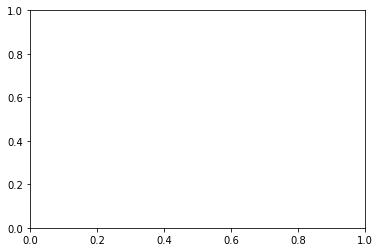

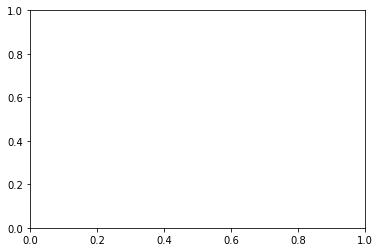

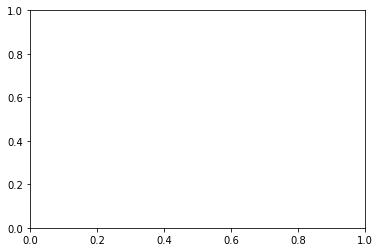

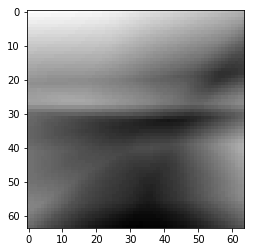

[[149]
 [ 54]
 [139]
 [ 70]
 [171]
 [ 54]
 [165]
 [ 37]
 [100]
 [146]
 [163]
 [ 31]
 [ 29]
 [ 52]
 [133]
 [ 79]
 [163]
 [ 37]
 [128]
 [ 68]
 [122]
 [128]
 [100]
 [ 52]
 [ 87]
 [ 89]
 [137]
 [ 60]
 [ 38]
 [ 62]
 [161]
 [104]
 [ 86]
 [ 30]
 [108]
 [100]
 [120]
 [ 85]
 [129]
 [148]
 [124]
 [103]
 [ 48]
 [133]
 [ 75]
 [132]
 [198]
 [128]
 [ 93]
 [ 98]]
[[146]
 [ 29]
 [153]
 [ 65]
 [ 38]
 [136]
 [152]
 [174]
 [ 44]
 [ 38]
 [ 98]
 [ 94]
 [ 75]
 [181]
 [170]
 [ 67]
 [101]
 [116]
 [ 54]
 [126]
 [ 38]
 [ 51]
 [ 97]
 [117]
 [ 54]
 [ 52]
 [ 35]
 [ 61]
 [ 54]
 [183]
 [169]
 [ 57]
 [124]
 [ 73]
 [125]
 [ 68]
 [116]
 [ 92]
 [ 33]
 [106]
 [116]
 [101]
 [138]
 [145]
 [ 49]
 [ 51]
 [112]
 [162]
 [ 57]
 [ 95]]
[[ 45]
 [ 34]
 [162]
 [ 74]
 [171]
 [ 36]
 [102]
 [136]
 [110]
 [ 65]
 [155]
 [ 96]
 [ 56]
 [ 93]
 [ 86]
 [ 78]
 [ 88]
 [ 84]
 [ 86]
 [ 34]
 [175]
 [ 95]
 [ 46]
 [ 51]
 [ 66]
 [ 75]
 [149]
 [121]
 [ 31]
 [ 79]
 [ 52]
 [174]
 [180]
 [ 52]
 [102]
 [181]
 [ 32]
 [151]
 [103]
 [133]
 [ 53]
 [ 42]
 [ 9

[[126]
 [ 27]
 [103]
 [ 72]
 [ 63]
 [102]
 [ 56]
 [ 67]
 [ 36]
 [153]
 [ 69]
 [ 33]
 [138]
 [112]
 [158]
 [ 76]
 [184]
 [ 55]
 [ 48]
 [ 85]
 [149]
 [ 86]
 [ 43]
 [168]
 [195]
 [115]
 [ 48]
 [118]
 [ 52]
 [134]
 [ 86]
 [ 56]
 [ 80]
 [ 62]
 [ 69]
 [ 48]
 [168]
 [ 86]
 [155]
 [ 95]
 [165]
 [155]
 [174]
 [166]
 [ 99]
 [ 70]
 [ 71]
 [116]
 [153]
 [ 38]]
20 33.154694
[[ 35]
 [ 65]
 [176]
 [154]
 [172]
 [ 50]
 [ 84]
 [100]
 [ 57]
 [ 76]
 [176]
 [121]
 [ 61]
 [ 86]
 [ 38]
 [119]
 [ 99]
 [ 84]
 [160]
 [131]
 [ 84]
 [174]
 [ 40]
 [120]
 [154]
 [157]
 [103]
 [ 35]
 [141]
 [161]
 [ 93]
 [ 91]
 [ 51]
 [149]
 [163]
 [157]
 [132]
 [ 66]
 [128]
 [150]
 [ 59]
 [105]
 [ 92]
 [155]
 [ 51]
 [ 88]
 [ 38]
 [133]
 [ 36]
 [157]]
[[ 55]
 [ 74]
 [ 48]
 [ 81]
 [170]
 [132]
 [ 35]
 [ 57]
 [ 79]
 [171]
 [143]
 [169]
 [ 66]
 [ 54]
 [ 66]
 [184]
 [ 44]
 [ 35]
 [127]
 [ 65]
 [ 55]
 [ 53]
 [ 82]
 [163]
 [ 65]
 [141]
 [125]
 [ 40]
 [100]
 [ 35]
 [156]
 [104]
 [ 41]
 [ 64]
 [186]
 [ 44]
 [ 41]
 [ 77]
 [136]
 [129]
 [ 54

21 31.918734
[[ 73]
 [ 31]
 [130]
 [128]
 [110]
 [ 49]
 [133]
 [ 33]
 [ 50]
 [ 42]
 [147]
 [ 99]
 [ 35]
 [ 88]
 [104]
 [166]
 [142]
 [150]
 [ 63]
 [107]
 [ 89]
 [ 51]
 [136]
 [ 88]
 [ 84]
 [ 53]
 [ 87]
 [131]
 [ 31]
 [ 41]
 [138]
 [205]
 [ 52]
 [ 62]
 [129]
 [ 36]
 [118]
 [156]
 [168]
 [ 84]
 [ 62]
 [ 46]
 [159]
 [ 79]
 [146]
 [112]
 [ 95]
 [167]
 [ 86]
 [161]]
[[ 89]
 [177]
 [120]
 [ 33]
 [ 24]
 [ 56]
 [ 93]
 [111]
 [209]
 [ 39]
 [ 38]
 [154]
 [ 93]
 [146]
 [ 61]
 [ 29]
 [177]
 [ 87]
 [109]
 [ 56]
 [ 63]
 [156]
 [142]
 [ 88]
 [ 37]
 [124]
 [ 30]
 [130]
 [ 59]
 [ 28]
 [ 84]
 [ 41]
 [138]
 [133]
 [ 76]
 [ 35]
 [158]
 [ 65]
 [ 44]
 [147]
 [166]
 [159]
 [138]
 [150]
 [ 45]
 [134]
 [147]
 [100]
 [ 27]
 [ 81]]
[[104]
 [ 80]
 [161]
 [155]
 [ 60]
 [ 53]
 [ 76]
 [163]
 [ 34]
 [ 38]
 [ 65]
 [142]
 [ 38]
 [154]
 [ 55]
 [181]
 [116]
 [ 50]
 [ 69]
 [102]
 [ 71]
 [ 91]
 [ 45]
 [ 59]
 [ 56]
 [130]
 [ 51]
 [146]
 [138]
 [ 86]
 [ 43]
 [122]
 [149]
 [ 39]
 [ 65]
 [ 81]
 [ 82]
 [ 79]
 [124]
 [ 87]
 [184

22 32.28833
[[136]
 [147]
 [198]
 [114]
 [180]
 [ 53]
 [ 25]
 [ 71]
 [152]
 [162]
 [152]
 [ 52]
 [136]
 [119]
 [ 63]
 [ 86]
 [ 57]
 [161]
 [ 74]
 [167]
 [144]
 [ 74]
 [116]
 [147]
 [157]
 [ 93]
 [170]
 [ 71]
 [144]
 [ 56]
 [107]
 [ 46]
 [ 71]
 [149]
 [ 97]
 [ 46]
 [131]
 [ 96]
 [140]
 [ 99]
 [ 84]
 [ 45]
 [124]
 [ 91]
 [113]
 [146]
 [137]
 [ 26]
 [ 99]
 [ 59]]
[[ 35]
 [132]
 [150]
 [ 96]
 [ 26]
 [ 33]
 [ 53]
 [174]
 [158]
 [ 70]
 [163]
 [ 50]
 [ 71]
 [149]
 [ 86]
 [175]
 [ 28]
 [ 80]
 [109]
 [ 29]
 [ 38]
 [ 49]
 [161]
 [ 88]
 [ 97]
 [ 32]
 [157]
 [ 63]
 [ 74]
 [ 31]
 [ 86]
 [ 26]
 [ 39]
 [ 41]
 [141]
 [105]
 [141]
 [ 71]
 [149]
 [160]
 [ 70]
 [123]
 [ 38]
 [ 47]
 [ 80]
 [142]
 [151]
 [104]
 [146]
 [ 86]]
[[ 60]
 [ 61]
 [ 99]
 [ 51]
 [ 97]
 [137]
 [ 86]
 [ 78]
 [ 51]
 [ 40]
 [151]
 [126]
 [134]
 [ 45]
 [ 69]
 [ 36]
 [175]
 [121]
 [113]
 [ 89]
 [138]
 [ 80]
 [118]
 [156]
 [168]
 [ 66]
 [198]
 [209]
 [ 69]
 [ 37]
 [178]
 [138]
 [ 73]
 [116]
 [ 48]
 [155]
 [ 44]
 [ 38]
 [139]
 [125]
 [124]

23 31.03664
[[ 84]
 [ 98]
 [ 33]
 [160]
 [136]
 [175]
 [ 67]
 [ 27]
 [ 31]
 [ 93]
 [116]
 [ 51]
 [104]
 [131]
 [134]
 [178]
 [ 89]
 [138]
 [ 86]
 [ 45]
 [ 76]
 [189]
 [ 94]
 [ 48]
 [111]
 [ 49]
 [142]
 [ 42]
 [ 92]
 [ 49]
 [ 29]
 [ 80]
 [157]
 [140]
 [125]
 [ 31]
 [145]
 [163]
 [ 70]
 [ 78]
 [122]
 [ 48]
 [148]
 [158]
 [ 37]
 [179]
 [ 74]
 [ 57]
 [165]
 [151]]
[[121]
 [152]
 [ 99]
 [117]
 [ 85]
 [ 35]
 [117]
 [ 37]
 [170]
 [ 29]
 [131]
 [ 78]
 [141]
 [ 69]
 [158]
 [ 76]
 [ 51]
 [ 60]
 [199]
 [ 46]
 [ 52]
 [ 45]
 [100]
 [134]
 [162]
 [128]
 [ 55]
 [141]
 [ 57]
 [ 32]
 [ 30]
 [146]
 [170]
 [ 74]
 [ 55]
 [ 57]
 [ 53]
 [170]
 [ 60]
 [ 44]
 [ 79]
 [120]
 [138]
 [138]
 [ 79]
 [ 69]
 [ 54]
 [107]
 [ 79]
 [ 37]]
[[ 77]
 [ 84]
 [ 58]
 [103]
 [ 70]
 [114]
 [124]
 [ 91]
 [135]
 [153]
 [113]
 [137]
 [101]
 [107]
 [ 70]
 [ 72]
 [114]
 [ 51]
 [ 66]
 [146]
 [134]
 [ 55]
 [105]
 [ 28]
 [152]
 [ 70]
 [140]
 [147]
 [183]
 [125]
 [ 45]
 [ 60]
 [ 55]
 [ 95]
 [129]
 [ 64]
 [ 92]
 [179]
 [172]
 [ 65]
 [ 63]

[[ 67]
 [ 43]
 [ 34]
 [143]
 [ 68]
 [ 31]
 [160]
 [ 88]
 [ 55]
 [ 93]
 [ 70]
 [ 90]
 [ 66]
 [104]
 [ 78]
 [ 87]
 [141]
 [ 74]
 [ 64]
 [151]
 [187]
 [ 34]
 [ 94]
 [175]
 [ 45]
 [ 83]
 [145]
 [ 51]
 [ 95]
 [ 40]
 [ 44]
 [ 74]
 [141]
 [ 60]
 [ 45]
 [192]
 [ 61]
 [111]
 [ 42]
 [101]
 [141]
 [ 45]
 [ 71]
 [ 54]
 [ 87]
 [156]
 [163]
 [ 29]
 [ 80]
 [ 73]]
[[ 66]
 [ 46]
 [ 28]
 [167]
 [ 91]
 [108]
 [138]
 [ 43]
 [130]
 [ 43]
 [ 85]
 [140]
 [144]
 [ 32]
 [163]
 [157]
 [172]
 [ 32]
 [163]
 [168]
 [161]
 [ 61]
 [109]
 [ 24]
 [163]
 [ 88]
 [169]
 [148]
 [ 34]
 [146]
 [169]
 [ 90]
 [ 54]
 [138]
 [ 56]
 [ 88]
 [128]
 [ 41]
 [174]
 [ 98]
 [ 55]
 [ 68]
 [ 61]
 [ 79]
 [ 54]
 [147]
 [ 46]
 [ 84]
 [166]
 [125]]
[[176]
 [ 30]
 [155]
 [109]
 [ 49]
 [150]
 [ 69]
 [ 85]
 [ 42]
 [ 40]
 [ 39]
 [132]
 [ 44]
 [ 51]
 [ 36]
 [157]
 [104]
 [ 50]
 [133]
 [ 69]
 [203]
 [ 63]
 [103]
 [ 76]
 [ 50]
 [ 50]
 [145]
 [ 31]
 [ 91]
 [ 80]
 [ 49]
 [ 79]
 [149]
 [129]
 [ 37]
 [ 93]
 [161]
 [119]
 [ 57]
 [108]
 [142]
 [ 80]
 [ 6

 [103]]
[[ 97]
 [ 85]
 [ 52]
 [ 42]
 [167]
 [161]
 [129]
 [148]
 [ 53]
 [158]
 [137]
 [ 63]
 [173]
 [122]
 [ 89]
 [166]
 [ 47]
 [ 60]
 [120]
 [169]
 [ 51]
 [124]
 [116]
 [156]
 [ 49]
 [143]
 [170]
 [ 63]
 [137]
 [ 69]
 [ 65]
 [ 74]
 [ 81]
 [135]
 [ 87]
 [156]
 [170]
 [159]
 [ 86]
 [ 35]
 [ 92]
 [123]
 [155]
 [ 90]
 [169]
 [142]
 [172]
 [ 48]
 [ 61]
 [121]]
[[ 93]
 [ 80]
 [ 31]
 [119]
 [ 61]
 [ 44]
 [186]
 [ 28]
 [116]
 [158]
 [ 79]
 [ 38]
 [134]
 [ 62]
 [ 45]
 [ 95]
 [ 54]
 [ 30]
 [122]
 [ 63]
 [ 52]
 [106]
 [143]
 [ 39]
 [168]
 [ 33]
 [ 87]
 [110]
 [ 31]
 [ 59]
 [156]
 [188]
 [114]
 [166]
 [ 78]
 [119]
 [ 84]
 [ 49]
 [ 44]
 [ 77]
 [ 71]
 [ 52]
 [ 40]
 [ 87]
 [144]
 [143]
 [ 68]
 [172]
 [ 95]
 [ 55]]
[[ 87]
 [ 88]
 [ 31]
 [159]
 [189]
 [187]
 [127]
 [ 72]
 [ 97]
 [156]
 [ 56]
 [ 73]
 [168]
 [ 90]
 [132]
 [ 42]
 [120]
 [159]
 [157]
 [ 93]
 [ 97]
 [107]
 [151]
 [ 44]
 [125]
 [ 65]
 [ 75]
 [ 60]
 [130]
 [ 40]
 [175]
 [ 66]
 [ 63]
 [ 53]
 [104]
 [142]
 [160]
 [ 63]
 [ 45]
 [ 34]
 [ 33]
 [1

[[ 58]
 [177]
 [ 83]
 [121]
 [167]
 [148]
 [141]
 [ 93]
 [ 58]
 [127]
 [125]
 [ 84]
 [ 52]
 [ 56]
 [120]
 [180]
 [ 62]
 [116]
 [ 69]
 [ 38]
 [108]
 [145]
 [113]
 [125]
 [ 38]
 [ 72]
 [ 86]
 [176]
 [109]
 [ 27]
 [ 34]
 [ 93]
 [179]
 [ 63]
 [138]
 [175]
 [ 76]
 [ 57]
 [ 55]
 [ 44]
 [102]
 [ 94]
 [124]
 [160]
 [ 72]
 [ 76]
 [ 27]
 [ 92]
 [ 39]
 [175]]
[[138]
 [117]
 [100]
 [103]
 [163]
 [121]
 [127]
 [111]
 [ 93]
 [151]
 [125]
 [131]
 [ 50]
 [ 54]
 [ 70]
 [ 74]
 [ 49]
 [ 90]
 [ 42]
 [ 82]
 [ 31]
 [ 62]
 [123]
 [172]
 [ 29]
 [ 88]
 [ 24]
 [ 53]
 [128]
 [ 43]
 [125]
 [ 97]
 [158]
 [ 85]
 [127]
 [106]
 [165]
 [107]
 [120]
 [198]
 [105]
 [ 92]
 [ 58]
 [173]
 [ 58]
 [ 73]
 [ 48]
 [ 35]
 [ 35]
 [ 81]]
[[145]
 [ 35]
 [152]
 [148]
 [ 59]
 [ 55]
 [ 96]
 [123]
 [ 91]
 [103]
 [ 50]
 [ 87]
 [ 32]
 [126]
 [ 60]
 [108]
 [ 48]
 [175]
 [ 56]
 [ 54]
 [ 84]
 [ 48]
 [ 42]
 [154]
 [ 62]
 [120]
 [ 92]
 [138]
 [ 90]
 [ 69]
 [ 88]
 [ 47]
 [ 62]
 [143]
 [ 57]
 [ 32]
 [ 77]
 [ 67]
 [116]
 [ 51]
 [ 33]
 [185]
 [11

[[ 68]
 [157]
 [113]
 [178]
 [ 76]
 [137]
 [ 78]
 [118]
 [132]
 [137]
 [157]
 [ 70]
 [148]
 [ 39]
 [ 95]
 [ 88]
 [ 32]
 [154]
 [103]
 [ 97]
 [136]
 [176]
 [174]
 [173]
 [157]
 [ 61]
 [ 76]
 [122]
 [172]
 [131]
 [ 82]
 [ 53]
 [165]
 [155]
 [ 32]
 [116]
 [ 50]
 [ 53]
 [ 54]
 [134]
 [ 62]
 [ 88]
 [103]
 [ 84]
 [109]
 [166]
 [155]
 [146]
 [ 61]
 [ 50]]
[[ 75]
 [ 56]
 [ 48]
 [ 55]
 [151]
 [ 29]
 [ 47]
 [101]
 [124]
 [133]
 [112]
 [115]
 [124]
 [124]
 [109]
 [ 70]
 [ 38]
 [165]
 [111]
 [ 80]
 [ 74]
 [160]
 [168]
 [ 55]
 [ 33]
 [ 52]
 [158]
 [167]
 [ 76]
 [ 49]
 [112]
 [ 31]
 [ 38]
 [ 39]
 [ 36]
 [128]
 [100]
 [104]
 [ 45]
 [ 70]
 [ 96]
 [124]
 [ 57]
 [ 78]
 [168]
 [ 78]
 [ 33]
 [ 36]
 [154]
 [ 70]]
[[134]
 [110]
 [ 84]
 [ 71]
 [ 49]
 [ 49]
 [ 75]
 [ 54]
 [ 26]
 [125]
 [ 69]
 [118]
 [163]
 [175]
 [150]
 [180]
 [115]
 [130]
 [ 95]
 [135]
 [ 29]
 [ 81]
 [ 36]
 [ 40]
 [116]
 [169]
 [111]
 [ 36]
 [143]
 [ 65]
 [101]
 [160]
 [ 47]
 [151]
 [104]
 [ 32]
 [ 70]
 [170]
 [182]
 [126]
 [124]
 [ 68]
 [ 4

[[ 75]
 [ 36]
 [104]
 [152]
 [ 25]
 [ 96]
 [160]
 [ 25]
 [ 54]
 [157]
 [168]
 [ 74]
 [199]
 [ 80]
 [137]
 [100]
 [ 31]
 [168]
 [ 53]
 [184]
 [104]
 [ 65]
 [ 64]
 [169]
 [ 86]
 [189]
 [ 82]
 [ 31]
 [ 91]
 [ 34]
 [ 94]
 [ 29]
 [170]
 [125]
 [158]
 [ 67]
 [162]
 [ 48]
 [176]
 [ 65]
 [100]
 [ 65]
 [ 74]
 [ 68]
 [ 81]
 [ 97]
 [ 26]
 [177]
 [167]
 [ 89]]
[[ 81]
 [ 95]
 [ 67]
 [ 61]
 [ 53]
 [135]
 [ 40]
 [ 35]
 [ 52]
 [ 69]
 [130]
 [120]
 [102]
 [118]
 [ 39]
 [ 59]
 [ 81]
 [ 99]
 [103]
 [142]
 [ 99]
 [128]
 [184]
 [153]
 [ 31]
 [ 80]
 [ 34]
 [136]
 [ 36]
 [140]
 [ 71]
 [139]
 [151]
 [165]
 [ 78]
 [ 54]
 [180]
 [ 49]
 [162]
 [ 77]
 [ 70]
 [123]
 [108]
 [126]
 [ 56]
 [ 58]
 [ 64]
 [179]
 [ 36]
 [105]]
[[ 74]
 [ 53]
 [111]
 [176]
 [ 44]
 [ 91]
 [ 52]
 [ 91]
 [ 29]
 [ 59]
 [155]
 [109]
 [ 32]
 [181]
 [ 39]
 [ 57]
 [ 51]
 [ 41]
 [190]
 [ 87]
 [139]
 [ 90]
 [ 81]
 [ 49]
 [ 87]
 [138]
 [112]
 [ 92]
 [171]
 [ 74]
 [ 46]
 [ 28]
 [117]
 [ 84]
 [ 87]
 [ 50]
 [ 55]
 [174]
 [111]
 [ 73]
 [151]
 [140]
 [ 8

[[ 54]
 [147]
 [ 49]
 [ 70]
 [143]
 [120]
 [ 71]
 [104]
 [ 82]
 [ 46]
 [106]
 [194]
 [156]
 [122]
 [ 71]
 [168]
 [ 49]
 [ 74]
 [130]
 [124]
 [ 57]
 [140]
 [200]
 [189]
 [ 85]
 [145]
 [ 33]
 [ 68]
 [ 67]
 [ 87]
 [ 73]
 [148]
 [185]
 [127]
 [ 39]
 [118]
 [158]
 [130]
 [ 82]
 [178]
 [ 34]
 [ 32]
 [129]
 [ 91]
 [179]
 [ 64]
 [154]
 [144]
 [117]
 [145]]
[[146]
 [101]
 [ 29]
 [106]
 [ 73]
 [ 84]
 [ 57]
 [127]
 [ 40]
 [ 97]
 [115]
 [103]
 [138]
 [ 79]
 [122]
 [149]
 [ 70]
 [ 26]
 [128]
 [ 56]
 [ 73]
 [117]
 [ 29]
 [ 71]
 [110]
 [ 35]
 [ 49]
 [127]
 [171]
 [ 52]
 [137]
 [135]
 [152]
 [102]
 [ 32]
 [189]
 [ 68]
 [149]
 [ 67]
 [109]
 [112]
 [103]
 [ 99]
 [101]
 [ 26]
 [ 28]
 [ 44]
 [156]
 [ 83]
 [ 43]]
[[ 40]
 [ 61]
 [136]
 [ 41]
 [ 82]
 [146]
 [ 92]
 [141]
 [146]
 [153]
 [ 65]
 [ 36]
 [123]
 [ 37]
 [154]
 [174]
 [ 35]
 [ 79]
 [ 33]
 [ 60]
 [122]
 [146]
 [ 63]
 [ 69]
 [ 88]
 [172]
 [163]
 [ 57]
 [148]
 [150]
 [166]
 [117]
 [125]
 [ 67]
 [115]
 [ 42]
 [ 34]
 [167]
 [ 42]
 [ 63]
 [ 64]
 [144]
 [ 4

[[161]
 [172]
 [ 63]
 [112]
 [110]
 [184]
 [ 64]
 [153]
 [ 97]
 [ 89]
 [136]
 [ 37]
 [ 44]
 [ 92]
 [143]
 [ 71]
 [121]
 [ 93]
 [ 67]
 [ 58]
 [189]
 [ 73]
 [141]
 [114]
 [ 37]
 [143]
 [131]
 [168]
 [ 61]
 [141]
 [ 51]
 [ 51]
 [132]
 [ 66]
 [ 87]
 [ 38]
 [ 55]
 [ 29]
 [123]
 [ 48]
 [ 95]
 [121]
 [ 68]
 [172]
 [165]
 [167]
 [ 34]
 [122]
 [ 55]
 [ 72]]
[[159]
 [ 84]
 [121]
 [107]
 [ 88]
 [ 67]
 [159]
 [ 30]
 [141]
 [ 42]
 [ 77]
 [108]
 [ 89]
 [109]
 [101]
 [159]
 [ 98]
 [ 95]
 [178]
 [ 55]
 [156]
 [153]
 [ 85]
 [ 53]
 [178]
 [ 71]
 [167]
 [165]
 [ 43]
 [ 53]
 [106]
 [125]
 [137]
 [ 32]
 [ 36]
 [ 49]
 [ 25]
 [ 60]
 [135]
 [ 41]
 [ 50]
 [122]
 [113]
 [111]
 [113]
 [103]
 [126]
 [162]
 [ 69]
 [ 55]]
[[113]
 [192]
 [140]
 [159]
 [ 63]
 [105]
 [ 87]
 [103]
 [ 96]
 [183]
 [122]
 [ 35]
 [ 58]
 [163]
 [ 52]
 [ 36]
 [ 27]
 [ 70]
 [ 40]
 [ 34]
 [ 24]
 [193]
 [ 37]
 [ 38]
 [148]
 [117]
 [ 75]
 [ 60]
 [ 68]
 [ 74]
 [ 74]
 [ 31]
 [139]
 [203]
 [121]
 [ 87]
 [156]
 [ 88]
 [ 66]
 [ 93]
 [ 70]
 [126]
 [ 8

[[ 84]
 [156]
 [191]
 [144]
 [ 50]
 [125]
 [ 75]
 [ 40]
 [ 86]
 [ 57]
 [ 53]
 [ 82]
 [108]
 [ 86]
 [ 51]
 [123]
 [159]
 [ 78]
 [ 28]
 [ 49]
 [112]
 [129]
 [131]
 [ 44]
 [ 37]
 [161]
 [107]
 [130]
 [ 61]
 [ 97]
 [ 32]
 [ 39]
 [ 39]
 [ 36]
 [141]
 [ 93]
 [ 42]
 [ 46]
 [123]
 [ 85]
 [138]
 [ 49]
 [ 88]
 [165]
 [ 36]
 [ 87]
 [117]
 [174]
 [ 48]
 [ 77]]
[[ 33]
 [136]
 [ 69]
 [ 65]
 [ 46]
 [147]
 [102]
 [ 91]
 [ 91]
 [158]
 [184]
 [155]
 [ 79]
 [ 44]
 [133]
 [113]
 [ 29]
 [153]
 [ 43]
 [ 49]
 [133]
 [111]
 [ 59]
 [ 61]
 [184]
 [ 69]
 [133]
 [ 57]
 [ 47]
 [137]
 [ 52]
 [124]
 [170]
 [121]
 [129]
 [159]
 [ 82]
 [ 60]
 [ 66]
 [149]
 [ 89]
 [ 35]
 [ 94]
 [ 97]
 [ 46]
 [ 32]
 [ 65]
 [168]
 [156]
 [ 84]]
[[ 57]
 [156]
 [ 33]
 [178]
 [ 58]
 [171]
 [104]
 [ 56]
 [157]
 [ 61]
 [ 64]
 [161]
 [164]
 [ 67]
 [ 43]
 [136]
 [122]
 [111]
 [180]
 [ 40]
 [ 61]
 [ 95]
 [ 90]
 [ 92]
 [ 42]
 [116]
 [ 93]
 [129]
 [138]
 [ 38]
 [174]
 [141]
 [132]
 [145]
 [ 86]
 [159]
 [ 28]
 [138]
 [ 29]
 [ 34]
 [ 89]
 [175]
 [ 5

KeyboardInterrupt: 

In [188]:
cost = tf.reduce_mean(
    tf.reduce_sum(tf.abs(Y_pred - Y), 1))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

n_iterations = 500
batch_size = 50
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set W and b to their initial random normal value.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        print(it_i, training_cost)

        if (it_i + 1) % 20 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            fig, ax = plt.subplots(1, 1)
            img = np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8)
            plt.imshow(img, cmap='gray')
            plt.show()

We can also try to predict the normal (aka Gaussian) distribution instead of grayscale/rgb values. To do so we'll need to compute the means and standard deviation of our linear regression. This is called a **mixture density model**, or MDN. It's a bit ahead of where we need to be at this moment learning-wise, but perhaps the performance comparison is interesting. Note what we are doing is computing the density of Y given X (out of a possible total of 1. if all Y occured at a given X) and using this as our **cost function** instead of taking the mean of the absolute difference

In [305]:
tf.reset_default_graph()

xs = []
ys = []
for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        xs.append([row_i, col_i])
        ys.append(img[row_i, col_i])

xs = np.array(xs)
ys = np.array(ys)

xs = (xs - np.mean(xs)) / np.std(xs)
ys = (ys / 255.0)

# add dim for ys (so tf treats it as matrix)
ys = np.expand_dims(ys, axis=1)

In [306]:
# probability density function
# Note: not sure if below or sigma out of sqrt is right
def gausspdf(x, mean, sigma):
    return tf.exp(-(x - mean)**2 /
                  (2 * sigma**2)) / (tf.sqrt(2.0 * np.pi * sigma))

#def gausspdf(x, mean, sigma):
#    dist = tf.contrib.distributions.Normal(mean, sigma) 
#    return dist.prob(x)

def build_single_gaussian_model(n_input_features=2,
                                n_output_features=1,
                                n_neurons =[64, 32, 14, 7, 28, 56]):

    
    X = tf.placeholder(tf.float32, shape=[None, n_input_features], name='X')
    Y = tf.placeholder(tf.float32, shape=[None, n_output_features], name='Y')
    
    current_input = X
    for layer_i in range(1, len(n_neurons)):
        current_input = tfl.linear(
            inputs=current_input,
            num_outputs=n_neurons[layer_i],
            activation_fn=tf.nn.tanh,
            scope='layer/' + str(layer_i))
    means = tfl.linear(
        inputs=current_input,
        num_outputs=n_output_features,
        activation_fn=None,
        scope='means')
    sigmas = tf.maximum(
        tfl.linear(
            inputs=current_input,
            num_outputs=n_output_features,
            activation_fn=tf.nn.relu,
            scope='sigmas'), 1e-8)

    p = gausspdf(Y, means, sigmas)
    negloglike = -tf.log(tf.maximum(p, 1e-8))
    #cost = tf.reduce_mean(tf.reduce_sum(negloglike, 1))
    cost = tf.reduce_mean(tf.reduce_mean(negloglike, 1))
    return X, Y, cost, means

cost: [0.5309025]
cost: [0.49588007]
cost: [0.5202751]
cost: [0.49737507]
cost: [0.52227426]
cost: [0.53961444]
cost: [0.5394577]
cost: [0.5524095]
cost: [0.80747485]
cost: [0.56507033]
cost: [0.54430485]
cost: [0.5420804]
cost: [0.54166824]
cost: [0.5414058]
cost: [0.54099214]
cost: [0.54352117]
cost: [1.8844451]
cost: [0.5183911]
cost: [0.5139885]
cost: [0.5325576]


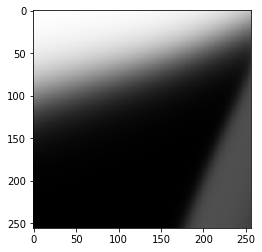

cost: [0.50009423]
cost: [0.5193221]
cost: [0.49289352]
cost: [0.5035821]
cost: [0.530151]
cost: [0.5474128]
cost: [0.9080977]
cost: [1.2361479]
cost: [0.48455837]
cost: [0.52386415]
cost: [1.5390633]
cost: [0.5321444]
cost: [1.6612089]
cost: [0.5017072]
cost: [0.46059647]
cost: [0.7095345]
cost: [0.47469515]
cost: [0.5165345]
cost: [1.1710398]
cost: [0.40324506]


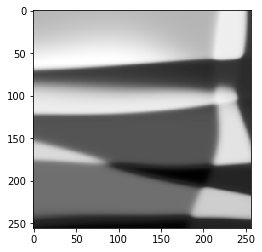

cost: [0.6933799]
cost: [0.47604352]
cost: [0.4753421]
cost: [0.6065701]
cost: [0.5085639]
cost: [0.5537286]
cost: [0.53360605]
cost: [0.63005686]
cost: [0.5214983]
cost: [1.6536903]
cost: [0.4894116]
cost: [0.43848437]
cost: [0.47494692]
cost: [0.48287117]
cost: [0.5118042]
cost: [1.5701541]
cost: [0.46297455]
cost: [0.42902118]
cost: [0.47820306]
cost: [0.49263832]


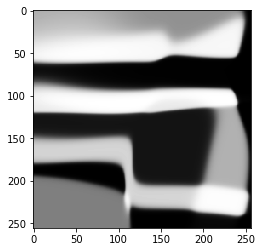

cost: [0.44328082]
cost: [0.43837053]
cost: [0.4091832]
cost: [0.40134513]
cost: [1.5427164]
cost: [0.4339841]
cost: [0.5226059]
cost: [0.5210469]
cost: [1.0402017]
cost: [0.50295764]
cost: [0.49607202]
cost: [0.4453968]
cost: [1.5427706]
cost: [0.40575197]
cost: [0.4891753]
cost: [0.41015553]
cost: [0.45743883]
cost: [0.58265305]
cost: [0.6284812]
cost: [1.5916328]


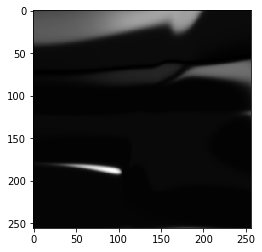

cost: [0.5517734]
cost: [1.5123205]
cost: [0.4846292]
cost: [0.5631955]
cost: [0.41437128]
cost: [1.2625341]
cost: [0.4517486]
cost: [0.4676993]
cost: [0.67939126]
cost: [0.42226422]
cost: [0.41747043]
cost: [0.5517704]
cost: [0.42390656]
cost: [0.49133015]
cost: [0.42612845]
cost: [0.3993125]
cost: [0.5408199]
cost: [0.5689032]
cost: [1.4669929]
cost: [0.48209703]


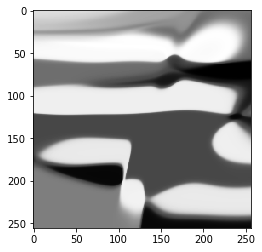

cost: [0.41877508]
cost: [0.5233167]
cost: [0.4849437]
cost: [0.49161753]
cost: [1.5692317]
cost: [0.5494461]
cost: [0.4733897]
cost: [0.3873614]
cost: [0.41107664]
cost: [1.1361916]
cost: [1.8111792]
cost: [0.4452868]
cost: [0.428875]
cost: [0.9903787]
cost: [1.3481026]
cost: [1.3678074]
cost: [0.4046895]
cost: [0.37106854]
cost: [1.4602405]
cost: [0.6617662]


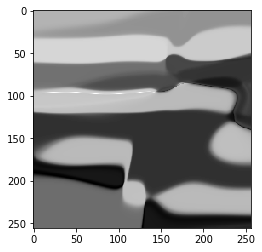

cost: [0.62324667]
cost: [1.8320606]
cost: [0.5377366]
cost: [0.5616501]
cost: [0.4676686]
cost: [0.63640416]
cost: [0.55877423]
cost: [1.5616338]
cost: [0.42936772]
cost: [1.9023011]
cost: [0.49880183]
cost: [0.5484769]
cost: [0.44680256]
cost: [0.5468477]
cost: [0.6401995]
cost: [0.61467844]
cost: [0.4535905]
cost: [0.4124012]
cost: [1.372972]
cost: [0.4311932]


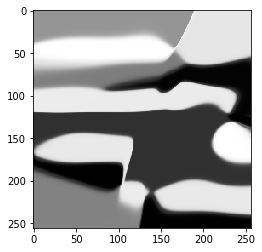

cost: [0.66886216]
cost: [0.41453534]
cost: [0.546254]
cost: [0.41933784]
cost: [1.9301143]
cost: [0.43996483]
cost: [0.89930505]
cost: [0.47998974]
cost: [0.5620589]
cost: [0.48795623]
cost: [0.41849256]
cost: [0.4135996]
cost: [0.4316169]
cost: [0.5334235]
cost: [0.465927]
cost: [1.101038]
cost: [0.5020699]
cost: [0.54123294]
cost: [0.46242535]
cost: [0.83317417]


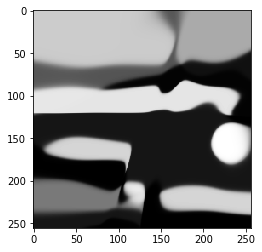

cost: [0.38657716]
cost: [0.4399957]
cost: [0.4541134]
cost: [0.41641048]
cost: [0.40774256]
cost: [1.5912592]
cost: [0.45624414]
cost: [0.43854812]
cost: [0.4118998]
cost: [0.429694]
cost: [0.5437156]
cost: [0.4785028]
cost: [0.36054456]
cost: [0.8797524]
cost: [0.43182427]
cost: [0.4168332]
cost: [0.4560933]
cost: [0.47615552]
cost: [1.399535]
cost: [1.2890772]


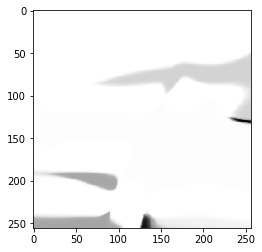

cost: [0.42035705]
cost: [0.8555675]
cost: [0.51]
cost: [1.5885661]
cost: [0.86337066]
cost: [0.41900355]
cost: [0.62504447]
cost: [0.41676682]
cost: [0.45809188]
cost: [0.45652992]
cost: [0.4568475]
cost: [0.57921576]
cost: [0.46053678]
cost: [0.50033]
cost: [0.41912547]
cost: [0.37772745]
cost: [0.39349103]
cost: [0.6083834]
cost: [0.37782973]
cost: [0.42402932]


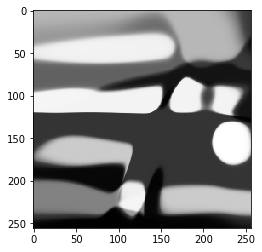

cost: [0.47941667]
cost: [0.43483597]
cost: [0.44960177]
cost: [0.84387755]
cost: [0.39605868]
cost: [0.45015162]
cost: [0.4531288]
cost: [0.5352317]
cost: [1.0558295]
cost: [0.4659416]
cost: [0.38863176]
cost: [0.55013216]


KeyboardInterrupt: 

In [307]:
n_iterations = 500
batch_size = 50
with tf.Session() as sess:
    img_d = img
    X, Y, cost, means = build_single_gaussian_model()
    optimizer = tf.train.AdamOptimizer(0.005).minimize(cost)
    init_op = tf.global_variables_initializer()
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set W and b to their initial random normal value.
    sess.run(init_op)
    # We now run a loop over epochs
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size:(batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})
        this_cost = sess.run([cost], feed_dict={X: xs, Y: ys})
        print('cost:', this_cost)
        if (it_i + 1) % 20 == 0:
            ys_pred = means.eval(feed_dict={X: xs}, session=sess)
            #img = np.clip(ys_pred.reshape(img.shape), 0, 1)
            img_d = ys_pred.reshape(img_d.shape)
            img_d = img_d/np.amax(img_d)
            plt.imshow(img_d, cmap='gray')
            plt.show()